In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import pickle

-----------------------------Integer Experiments------------------------------------------------------------------------------------------------------------------------

In [61]:
dataset = pd.read_csv("../Data/zipf_data_09_12.csv")
dataset = dataset[dataset["Bits Available"]>=4]
dataset = dataset[dataset["Bits Available"]<=14]
three_filter_bloom = dataset[dataset["Num Layers"]==3]
learned_bloom = pd.read_csv("../Data/learned_bloom_firehose_data_2.csv")
sandwich_bloom = pd.read_csv("../Data/sandwich_firehose_sweep.csv")

In [ ]:
with open("../Data/learned_bloom_fprs_integers.p", "rb") as f:
    learned_bloom_fpr = pickle.load(f)

In [ ]:
with open("../Data/learned_bloom_sizes_integers.p", "rb") as f:
    learned_bloom_size = pickle.load(f)

In [62]:
bloom_filter_fpr = np.geomspace(.5, .001, 20)
bloom_filter_size = 1.44*np.log2(1/bloom_filter_fpr)
bloom_filter_fpr_linear = np.linspace(.5, .001, 20)
bloom_filter_size_linear = 1.44*np.log2(1/bloom_filter_fpr_linear)

In [65]:
three_filter_bloom_00 = three_filter_bloom[three_filter_bloom["Zipf Parameter"]== 0]
three_filter_bloom_50 = three_filter_bloom[three_filter_bloom["Zipf Parameter"]==.5]
three_filter_bloom_75 = three_filter_bloom[three_filter_bloom["Zipf Parameter"]==.75]
three_filter_bloom_1 = three_filter_bloom[three_filter_bloom["Zipf Parameter"]==1.02]
three_filter_bloom_125 = three_filter_bloom[three_filter_bloom["Zipf Parameter"]==1.25]

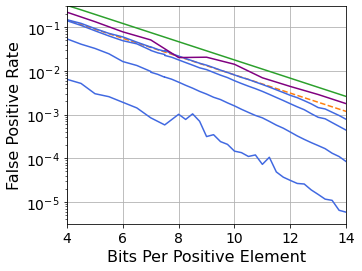

In [66]:
plt.figure(figsize=[5,4])
plt.plot(bloom_filter_size, bloom_filter_fpr, label="Traditional Filter", linestyle="--", color="tab:orange")
plt.plot(three_filter_bloom_50["Bits Available"],three_filter_bloom_50["Total FPR"], label = "Stacked Filter", color="royalblue")
plt.plot(three_filter_bloom_75["Bits Available"],three_filter_bloom_75["Total FPR"], color="royalblue")
plt.plot(three_filter_bloom_1["Bits Available"],three_filter_bloom_1["Total FPR"], color="royalblue")
plt.plot(three_filter_bloom_125["Bits Available"],three_filter_bloom_125["Total FPR"],  color="royalblue")
plt.plot(learned_bloom["Bits Per Element"],learned_bloom["Total FPR"], label = "Learned Bloom Filter", color="tab:green")
plt.plot(sandwich_bloom["Bits Per Element"],sandwich_bloom["Total FPR"], label = "Sandwich Bloom Filter", color="purple")
plt.yscale("log")
plt.ylabel("False Positive Rate", fontsize=16)
plt.ylim(ymax = .3, ymin=10**-5.5)
plt.xlim(xmin=4, xmax=14)
plt.xlabel("Bits Per Positive Element", fontsize=16)
#plt.legend(loc="lower left", prop={'size':11}, frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('../Figures/Synthetic_FPR_Bloom.pdf', bbox_inches='tight')
plt.show()

In [ ]:
flex_filter_bloom_50 = pd.read_csv("../Data/stacked_filters_layers_flex_050.csv")
flex_filter_bloom_75 = pd.read_csv("../Data/stacked_filters_layers_flex_075.csv")
flex_filter_bloom_1 = pd.read_csv("../Data/stacked_filters_layers_flex_100.csv")
flex_filter_bloom_125 = pd.read_csv("../Data/stacked_filters_layers_flex_125.csv")

In [ ]:
print(flex_filter_bloom_75.columns)

In [ ]:
plt.figure(figsize=[5,4])
plt.plot(bloom_filter_size, bloom_filter_fpr, label="Traditional BF", linestyle="--", color="tab:orange")
plt.plot(three_filter_bloom_50["Bits Available"],three_filter_bloom_50["Total FPR"], label = "3-Layer Stacked BF", color="royalblue")
plt.plot(three_filter_bloom_75["Bits Available"],three_filter_bloom_75["Total FPR"], color="royalblue")
plt.plot(three_filter_bloom_1["Bits Available"],three_filter_bloom_1["Total FPR"], color="royalblue")
plt.plot(three_filter_bloom_125["Bits Available"],three_filter_bloom_125["Total FPR"],  color="royalblue")
plt.plot(flex_filter_bloom_50["Bits Available"],flex_filter_bloom_50["Total FPR"], label = "Variable-Height Stacked BF", color="purple")
plt.plot(flex_filter_bloom_75["Bits Available"],flex_filter_bloom_75["Total FPR"], color="purple")
plt.plot(flex_filter_bloom_1["Bits Available"],flex_filter_bloom_1["Total FPR"], color="purple")
plt.plot(flex_filter_bloom_125["Bits Available"],flex_filter_bloom_125["Total FPR"],  color="purple")
plt.yscale("log")
plt.ylabel("Observed False Positive Rate")
plt.ylim(ymax = .05, ymin=10**-5.5)
plt.xlabel("Bits Per Positive Element")
plt.xlim(xmin=8, xmax=14)
plt.legend(loc="lower left")
plt.grid()
plt.savefig('../Figures/FPR_Bloom_Flex.pdf', bbox_inches='tight')
plt.show()

In [ ]:
print(flex_filter_bloom_125["Num Layers"])

In [ ]:
plt.yscale("log")
#plt.ylabel("Filters' False Positive Rate")
plt.ylim(ymax = .05, ymin=10**-5.5)
#plt.xlabel("Filters' Memory (Bits Per Element)")
plt.xlim(xmin=8, xmax=14)
#plt.title("Stacked Filters")
plt.legend(ncol=1, prop={'size':9})
#plt.grid()
plt.show()

In [ ]:
#plt.figure(figsize=(15,10))
plt.plot(bloom_filter_size, bloom_filter_fpr, label="Traditional BF", linestyle="--")
plt.plot(three_filter_bloom_00["Bits Available"],three_filter_bloom_00["Total FPR"], label = "Stacked BF Uniform", color="red")
plt.plot(three_filter_bloom_50["Bits Available"],three_filter_bloom_50["Total FPR"], label = "Stacked BF .5 Zipf", color="orange")
plt.plot(three_filter_bloom_75["Bits Available"],three_filter_bloom_75["Total FPR"], label = "Stacked BF .75 Zipf", color="green")
plt.plot(three_filter_bloom_1["Bits Available"],three_filter_bloom_1["Total FPR"], label = "Stacked BF 1 Zipf", color="blue")
plt.ylabel("False Positive Rate")
plt.xlabel("Bits Per Positive Element")
plt.title("Traditional Filter Vs Stacked Filter for Various Distributions")
plt.legend()
plt.show()

In [ ]:
standard_perpdata = pd.read_csv("../Data/performance_standard_10_04.csv")
stacked_comp_data = pd.read_csv("../Data/performance_stacked_10_04.csv")

In [ ]:
bits = ["8","10","12","14"]
standard_negative_lookups_per_sec =  1/(standard_comp_data["Negative Lookup Time"])
stacked_negative_lookup_per_sec =  1/(stacked_comp_data["Negative Lookup Time"])

x = np.arange(len(bits))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_negative_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x + width/2, standard_negative_lookups_per_sec, width, label='Traditional Bloom Filter',color="tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Negative Throughput (10^6 QPS)', fontsize=13)
ax.set_ylim(ymax=25)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

plt.tick_params(
    axis='x',  
    which='both',
    bottom=False,
    top=False,        
    labelbottom=False)
fig.tight_layout()
plt.savefig('../Figures/Negative_Queries_Bloom.pdf', bbox_inches='tight')
plt.show()


In [ ]:
bits = ["8","10","12","14"]
standard_positive_lookups_per_sec =  1/(standard_comp_data["Positive Lookup Time"])
stacked_positive_lookups_per_sec =  1/(stacked_comp_data["Positive Lookup Time"])

x = np.arange(len(bits))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_positive_lookups_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x + width/2, standard_positive_lookups_per_sec, width, label='Traditional Bloom Filter',color="tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Positive Throughput (10^6 QPS)', fontsize=13)
ax.set_xlabel('Bits Per Positive Element', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(bits)
ax.set_ylim(ymax=25)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('../Figures/Positive_Queries_Bloom.pdf', bbox_inches='tight')

plt.show()


In [ ]:
bits = ["8","10","12","14"]
standard_inserts_per_sec =  standard_comp_data["Construction Time"]
stacked_inserts_per_sec =  stacked_comp_data["Construction Time"]

x = np.arange(len(bits))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_inserts_per_sec, width, label='Stacked Bloom Filter')
rects2 = ax.bar(x + width/2, standard_inserts_per_sec, width, label='Traditional Bloom Filter')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Construction Time (Seconds)')
ax.set_xlabel('Bits Per Positive Element')
ax.set_title('Construction Time')
ax.set_xticks(x)
ax.set_xticklabels(bits)
ax.set_ylim(ymax=2.25)
ax.legend(loc="upper center")


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [ ]:
varied_size_data = pd.read_csv("../Data/size_data_09_12.csv")
#varied_size_data = varied_size_data[varied_size_data["Total FPR"]!=0]
positives_00 =  varied_size_data[varied_size_data["Zipf Parameter"]==0]
positives_50 =  varied_size_data[varied_size_data["Zipf Parameter"]==.5]
positives_75 =  varied_size_data[varied_size_data["Zipf Parameter"]==.75]
positives_100 =  varied_size_data[varied_size_data["Zipf Parameter"]==1.02]

In [ ]:
plt.axhline(0.008193722, label="Traditional Bloom Filter", linestyle = "--")
plt.plot(positives_00["Negative Universe Size"], positives_00["Total FPR"], label="Stacked BF 0 Zipf")
plt.plot(positives_50["Negative Universe Size"], positives_50["Total FPR"], label="Stacked BF .5 Zipf")
plt.plot(positives_75["Negative Universe Size"], positives_75["Total FPR"], label="Stacked BF .75 Zipf")
plt.plot(positives_100["Negative Universe Size"], positives_100["Total FPR"], label="Stacked BF 1 Zipf")
plt.yscale("log")
plt.xscale("log")
plt.axis( ymin = .00001, xmin=10000000, xmax=200000000)
plt.ylabel("False Positive Rate")
plt.xlabel("Number of Negative Elements")
plt.title("Effect of Negative Universe Size on FPR")
plt.legend()
plt.show()

In [ ]:
stacked_bloom_050 = pd.read_csv("../Data/EFPB_stacked_bloom_050.csv")
stacked_bloom_075 = pd.read_csv("../Data/EFPB_stacked_bloom_075.csv")
stacked_bloom_100 = pd.read_csv("../Data/EFPB_stacked_bloom_100.csv")
stacked_bloom_125 = pd.read_csv("../Data/EFPB_stacked_bloom_125.csv")

In [ ]:
plt.figure(figsize=[5,4])
plt.plot(bloom_filter_size,bloom_filter_fpr, label="Traditional BF", linestyle = "--", color="tab:orange")
plt.plot(stacked_bloom_050["Bits Available"], stacked_bloom_050["EFPB"], label="Stacked BF", color="royalblue")
plt.plot(stacked_bloom_075["Bits Available"], stacked_bloom_075["EFPB"], color="royalblue")
plt.plot(stacked_bloom_100["Bits Available"], stacked_bloom_100["EFPB"], color="royalblue")
plt.plot(stacked_bloom_125["Bits Available"], stacked_bloom_125["EFPB"], color="royalblue")
plt.yscale("log")
plt.ylim(ymax = .05, ymin=10**-5.5)
plt.xlim(xmin=8, xmax=14)
plt.ylabel("EFPB")
plt.xlabel("Bits Per Positive Element")
plt.legend(loc="lower left")
plt.grid()
plt.savefig('../Figures/EFPB_Bloom.pdf', bbox_inches='tight')
plt.show()

In [ ]:
zipf_sweep_01 = pd.read_csv("../Data/stacked_zipf_sweep_010.csv")

In [ ]:
plt.figure(figsize=[5,4])
plt.hlines(9.6,0,1.5, label = "Traditional BF", ls="--")
plt.plot(zipf_sweep_01["Zipf Parameter"], zipf_sweep_01["Used Bits"], label="Stacked BF")
plt.ylabel("Bits Per Positive For 1% EFPR")
plt.xlabel("Zipf Parameter")
plt.xlim(xmax=1.3)
plt.title("Stacked Filters Skew Robustness")
plt.legend(ncol=2, loc="lower left",prop={'size': 8.5})
plt.grid()
plt.show()

In [ ]:
zipf_sweep_010 = pd.read_csv("../Data/stacked_zipf_sweep_010_REDO.csv")
zipf_sweep_005 = pd.read_csv("../Data/stacked_zipf_sweep_005.csv")
zipf_sweep_001 = pd.read_csv("../Data/stacked_zipf_sweep_001.csv")

In [ ]:
zipf_sweep_010 = pd.read_csv("../Data/stacked_zipf_sweep_010_REDO.csv")
zipf_sweep_005 = pd.read_csv("../Data/stacked_zipf_sweep_005.csv")
zipf_sweep_001 = pd.read_csv("../Data/stacked_zipf_sweep_001.csv")
zipf_sweep_010["Traditional BF Fraction"] = zipf_sweep_010["Used Bits"]/9.6*100
zipf_sweep_005["Traditional BF Fraction"] = zipf_sweep_005["Used Bits"]/11.1*100
zipf_sweep_001["Traditional BF Fraction"] = zipf_sweep_001["Used Bits"]/14.375*100

In [ ]:
plt.figure(figsize=[5,4])
plt.hlines(100,0,1.5, label = "Traditional BF", ls="--", color="tab:orange")
plt.plot(zipf_sweep_010["Zipf Parameter"], zipf_sweep_010["Traditional BF Fraction"], label="Stacked BF", color="royalblue")
plt.plot(zipf_sweep_005["Zipf Parameter"], zipf_sweep_005["Traditional BF Fraction"], color="royalblue")
plt.plot(zipf_sweep_001["Zipf Parameter"], zipf_sweep_001["Traditional BF Fraction"], color="royalblue")
plt.ylabel("Stacked/Traditional Size(%)", fontsize=16)
plt.xlabel("Zipf Parameter", fontsize=16)
plt.xlim(xmin=0,xmax=1.4)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(loc="lower left",prop={'size': 14}, frameon=False)
plt.grid()
plt.savefig('../Figures/skew_Bloom.pdf', bbox_inches='tight')
plt.show()

In [ ]:
zipf_sweep_001 = pd.read_csv("../Data/stacked_zipf_sweep_001.csv")

In [ ]:
plt.figure(figsize=[5,4])
plt.hlines(14.25,0,1.5, label = "Traditional BF", ls="--")
plt.plot(zipf_sweep_001["Zipf Parameter"], zipf_sweep_001["Used Bits"], label="Stacked BF")
plt.ylabel("Bits Per Positive For .1% EFPR")
plt.xlabel("Zipf Parameter")
plt.xlim(xmax=1.3)
plt.title("Stacked Filters Skew Robustness")
plt.legend(ncol=2, loc="lower left",prop={'size': 8.5})
plt.grid()
plt.show()

In [ ]:
workload_sweep_010 = pd.read_csv("../Data/workload_knowledge_sweep_010.csv")
workload_sweep_005 = pd.read_csv("../Data/workload_knowledge_sweep_005.csv")
workload_sweep_001 = pd.read_csv("../Data/workload_knowledge_sweep_001.csv")

In [ ]:
print(workload_sweep_001)

In [ ]:
plt.plot(workload_sweep_010["Number of Known Negatives Available"], workload_sweep_010["Used Bits"], label="Stacked Filter", color="royalblue")
plt.plot(workload_sweep_005["Number of Known Negatives Available"], workload_sweep_005["Used Bits"], color="royalblue")
plt.plot(workload_sweep_001["Number of Known Negatives Available"], workload_sweep_001["Used Bits"], color="royalblue")
plt.xscale("log")
plt.axis(xmin=100000, xmax=50000000, ymin=8, ymax=15)
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Number of Negative Elements Available")
plt.legend()
plt.show()

In [ ]:
data_sizes_sweep_010 = pd.read_csv("../Data/data_sizes_sweep_010.csv")
data_sizes_sweep_005 = pd.read_csv("../Data/data_sizes_sweep_005.csv")
data_sizes_sweep_001 = pd.read_csv("../Data/data_sizes_sweep_001.csv")

In [ ]:
plt.figure(figsize=[5,4])
plt.plot(data_sizes_sweep_010["Number Of Positive Elements"], data_sizes_sweep_010["Used Bits"], label="Stacked Filter", color="royalblue")
plt.plot(data_sizes_sweep_005["Number Of Positive Elements"], data_sizes_sweep_005["Used Bits"], color="royalblue")
plt.plot(data_sizes_sweep_001["Number Of Positive Elements"], data_sizes_sweep_001["Used Bits"], color="royalblue")
plt.xscale("log")
plt.axis(xmin=100000, xmax=800000000, ymin=8, ymax=14)
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Number of Positive Elements Stored")
plt.legend()
plt.grid()
plt.savefig('../Figures/data_sizes_Bloom.pdf', bbox_inches='tight')
plt.show()

In [ ]:
construction_sweep = pd.read_csv("../Data/construction_negatives_sweep_010_REDO2.csv")

In [ ]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=[5,4])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
f.text(0.5, 0., "Negative Elements Stored (Millions)", ha='center', fontsize=16)
f.text(-.05, 0.5,"Construction Time (sec)", va='center', rotation='vertical', fontsize=16)

# plot the same data on both axes
ax2.plot(construction_sweep["Number of Known Negatives Chosen"]/1000000, construction_sweep["Construction Time"]+.25, label="Stacked Filter", color="royalblue")
ax2.hlines(.08, 0, 51000000/1000000, ls="--", color="tab:orange", label="Traditional Filter")
ax.hlines(60*60,0, 51000000/1000000, color="tab:green", label="Learned Filter")

# zoom-in / limit the view to different portions of the data
ax.set_ylim(58*60, 62*60)  # outliers only
ax2.set_ylim(0, 1)  # most of the data

ax.set_xlim(xmin=0,xmax=10)

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
ax.tick_params(labeltop=False, labelsize=14)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


ax.grid()
ax2.grid()
# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
plt.legend(frameon=False)
ax.legend(frameon=False)

plt.savefig('../Figures/construction_sweep_Bloom.pdf', bbox_inches='tight')
plt.show()

In [ ]:
psi_sweep = pd.read_csv("../Data/psi_sweep_graph_010.csv")

In [ ]:
unknown_050 = (psi_sweep[psi_sweep["Zipf Parameter"]==.52]["Unknown FPR"])[0]
unknown_075 = (psi_sweep[psi_sweep["Zipf Parameter"]==.77]["Unknown FPR"])[1]
unknown_100 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.02]["Unknown FPR"])[2]
unknown_125 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.27]["Unknown FPR"])[3]
known_050 = (psi_sweep[psi_sweep["Zipf Parameter"]==.52]["Known FPR"])[0]
known_075 = (psi_sweep[psi_sweep["Zipf Parameter"]==.77]["Known FPR"])[1]
known_100 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.02]["Known FPR"])[2]
known_125 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.27]["Known FPR"])[3]
psi_050 = (psi_sweep[psi_sweep["Zipf Parameter"]==.52]["Psi"])[0]
psi_075 = (psi_sweep[psi_sweep["Zipf Parameter"]==.77]["Psi"])[1]
psi_100 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.02]["Psi"])[2]
psi_125 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.27]["Psi"])[3]
bits_050 = (psi_sweep[psi_sweep["Zipf Parameter"]==.52]["Used Bits"])[0]
bits_075 = (psi_sweep[psi_sweep["Zipf Parameter"]==.77]["Used Bits"])[1]
bits_100 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.02]["Used Bits"])[2]
bits_125 = (psi_sweep[psi_sweep["Zipf Parameter"]==1.27]["Used Bits"])[3]

In [ ]:
psi_frac = np.linspace(0,1, 10)
psi_sweep_050_mix = []
psi_sweep_075_mix = []
psi_sweep_100_mix = []
psi_sweep_125_mix = []
for i in range(len(psi_frac)):
    psi_sweep_050_mix.append(known_050*(1-psi_frac[i])*psi_050+unknown_050*(1-(1-psi_frac[i])*psi_050)/(math.exp(-bits_050*math.log(2)**2)))
    psi_sweep_075_mix.append(known_075*(1-psi_frac[i])*psi_075+unknown_075*(1-(1-psi_frac[i])*psi_075)/(math.exp(-bits_075*math.log(2)**2)))
    psi_sweep_100_mix.append(known_100*(1-psi_frac[i])*psi_100+unknown_100*(1-(1-psi_frac[i])*psi_100)/(math.exp(-bits_100*math.log(2)**2)))
    psi_sweep_125_mix.append(known_125*(1-psi_frac[i])*psi_100+unknown_125*(1-(1-psi_frac[i])*psi_125)/(math.exp(-bits_125*math.log(2)**2)))

In [ ]:
ax = plt.figure(figsize=[5,4])
plt.hlines(1, 0, 1, label = "Traditional Filter", ls="--", color="tab:orange")
plt.plot(1-psi_frac, psi_sweep_050_mix, label="Stacked Filter", color="royalblue")
plt.plot(1-psi_frac, psi_sweep_075_mix, color="royalblue")
plt.plot(1-psi_frac, psi_sweep_100_mix, color="royalblue")
plt.plot(1-psi_frac, psi_sweep_125_mix, color="royalblue")
plt.ylabel("Stacked/Traditional EFPR", fontsize=16)
plt.xlabel(r'Proportion of Initial $\psi$', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(prop={'size':14}, frameon=False)
plt.grid()
plt.xlim(1,0)
plt.savefig('../Figures/psi_sweep_Bloom.pdf', bbox_inches='tight')
plt.show()

In [ ]:
plt.hlines(1, 0, 1, label = "Traditional Filter", ls="--", color="tab:orange")
plt.plot(psi_frac, psi_sweep_050_mix, label="Stacked Filter", color="royalblue")
plt.plot(psi_frac, psi_sweep_075_mix, color="royalblue")
plt.plot(psi_frac, psi_sweep_100_mix, color="royalblue")
plt.plot(psi_frac, psi_sweep_125_mix, color="royalblue")
plt.ylabel("Stacked/Traditional EFPR", fontsize=16)
plt.xlabel("Reduction of Psi (%)", fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(prop={'size':14})
plt.savefig('../Figures/data_sizes_Bloom.pdf', bbox_inches='tight')
plt.show()

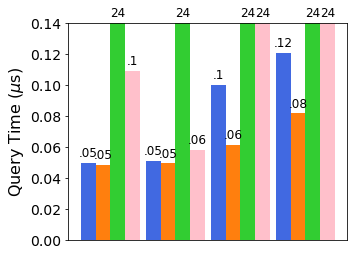

In [143]:
f, (ax) = plt.subplots(figsize=[5,4])
axis_ymax = .14

# plot the same data on both axesstacked = pd.read_csv("../Data/url_blacklisting_stacked_performance.csv")stacked = pd.read_csv("../Data/firehose_comp_3.csv")
stacked = pd.read_csv("../Data/synthetic_comp_performance_STACKED.csv")
stacked_positive_lookup_per_sec =  (stacked["Positive Lookup Time"])
stacked_negative_lookup_per_sec =  (stacked["Negative Lookup Time"])
traditional = pd.read_csv("../Data/synthetic_comp_performance_TRADITIONAL.csv")
traditional_positive_lookup_per_sec =  (traditional["Positive Lookup Time"])
traditional_negative_lookup_per_sec =  (traditional["Negative Lookup Time"])

sandwich_lookup_per_sec = [24.2*.0025+traditional_negative_lookup_per_sec[0], 24.2*.0004+traditional_negative_lookup_per_sec[0], 24.2, 24.2]

traditional_lookup_per_sec = [traditional_negative_lookup_per_sec[0], 
                              traditional_negative_lookup_per_sec[1],
                              traditional_positive_lookup_per_sec[0],
                              traditional_positive_lookup_per_sec[1]]
stacked_lookup_per_sec = [stacked_negative_lookup_per_sec[0],
                          stacked_negative_lookup_per_sec[1],
                          stacked_positive_lookup_per_sec[0],
                          stacked_positive_lookup_per_sec[1]]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
rae_et_al_lookup_per_sec = [24.2,24.2,24.2,24.2]
x = np.arange(4)  # the label locations
width = 0.225 # the width of the bars

rects1 = ax.bar(x - 3*width/2, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")

rects2 = ax.bar(x - width/2, traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")

rects3 = ax.bar(x + width/2, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")

rects4 = ax.bar(x + 3*width/2, sandwich_lookup_per_sec, width, label='Sandwich Learned BF', color="pink")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Query Time ($\mu$s)',fontsize=16)
ax.set_ylim(ymax=axis_ymax)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.2f}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value).lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        if(value<1):
            ax.annotate('{0:.1g}'.format(value).lstrip("0"),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=12)
        else:
            ax.annotate('{0:.2g}'.format(value).lstrip("0"),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=12)
            


autolabel(rects1)
autolabel(rects2)
autolabel2(rects3)
autolabel3(rects4)

plt.tick_params(axis="y", labelsize=14)

plt.tick_params(
    axis='x',  
    which='both',
    bottom=False,
    top=False,        
    labelbottom=False)

fig.tight_layout()
plt.savefig('../Figures/Comp_Performance_Synthetic.pdf', bbox_inches='tight')
plt.show()

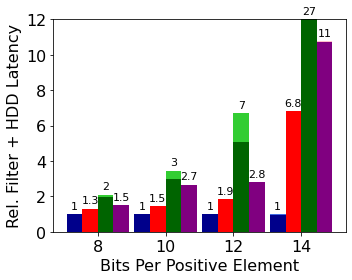

In [138]:
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/synthetic_disk_performance_STACKED_HDD.csv")
standard_comp_data = pd.read_csv("../Data/synthetic_disk_performance_TRADITIONAL_HDD.csv")
negative_lookups = standard_comp_data["Sample Size"]
learned_false_positives = negative_lookups*np.array([0.0314,0.015791,0.007916,0.001989])
sandwiched_false_positives = negative_lookups*np.array([0.024196, 0.014167, 0.004406, 0.001781])
sandwiched_proportion_model_lookups = np.array([.007, .0025, .001, .0004])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*negative_lookups)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups
learned_comp_time_disk = learned_comp_time_disk/negative_lookups

sandwich_comp_time_total = (negative_lookups)*(.0000242)*sandwiched_proportion_model_lookups+sandwiched_false_positives*network_time_per_lookup
sandwich_comp_time_disk = sandwiched_false_positives*network_time_per_lookup
sandwich_comp_time_total = sandwich_comp_time_total/negative_lookups
sandwich_comp_time_disk = sandwich_comp_time_disk/negative_lookups

# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
sandwich_comp_time_total = sandwich_comp_time_total/stacked_comp_time_total
sandwich_comp_time_disk = sandwich_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total


x = np.arange(len(bits))  # the label locations
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])

rects1 = ax.bar(x - 3*width/2, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x - width/2, trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width/2, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x + 3*width/2, sandwich_comp_time_total, width, label='Sandwiched Bloom Filter',color="pink")
rects5 = ax.bar(x - 3*width/2, stacked_comp_time_disk, width, color="darkblue")
rects6 = ax.bar(x - width/2, trad_comp_time_disk, width ,color="red")
rects7 = ax.bar(x + width/2, learned_comp_time_disk, width, color="darkgreen")
rects8 = ax.bar(x + 3*width/2, sandwich_comp_time_disk, width, color="purple")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + HDD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymin=0,ymax=12)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, 12)
        ax.annotate('{0:.2g}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, 12)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, 12)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)


autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)
autolabel1(rects4)

fig.tight_layout()
plt.savefig('../Figures/Synthetic_Queries_HDD.pdf', bbox_inches='tight')

plt.show()

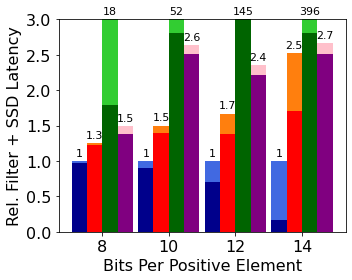

In [3]:
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/synthetic_disk_performance_STACKED_SSD.csv")
standard_comp_data = pd.read_csv("../Data/synthetic_disk_performance_TRADITIONAL_SSD.csv")
negative_lookups = standard_comp_data["Sample Size"]
learned_false_positives = negative_lookups*np.array([0.0314,0.015791,0.007916,0.001989])
sandwiched_false_positives = negative_lookups*np.array([0.024196, 0.014167, 0.004406, 0.001781])
sandwiched_proportion_model_lookups = np.array([.007, .0025, .001, .0004])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*negative_lookups)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups
learned_comp_time_disk = learned_comp_time_disk/negative_lookups

sandwich_comp_time_total = (negative_lookups)*(.0000242)*sandwiched_proportion_model_lookups+sandwiched_false_positives*network_time_per_lookup
sandwich_comp_time_disk = sandwiched_false_positives*network_time_per_lookup
sandwich_comp_time_total = sandwich_comp_time_total/negative_lookups
sandwich_comp_time_disk = sandwich_comp_time_disk/negative_lookups

# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
sandwich_comp_time_total = sandwich_comp_time_total/stacked_comp_time_total
sandwich_comp_time_disk = sandwich_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total


x = np.arange(len(bits))  # the label locations
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])

rects1 = ax.bar(x - 3*width/2, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x - width/2, trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width/2, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x + 3*width/2, sandwich_comp_time_total, width, label='Sandwiched Bloom Filter',color="pink")
rects5 = ax.bar(x - 3*width/2, stacked_comp_time_disk, width, color="darkblue")
rects6 = ax.bar(x - width/2, trad_comp_time_disk, width ,color="red")
rects7 = ax.bar(x + width/2, learned_comp_time_disk, width, color="darkgreen")
rects8 = ax.bar(x + 3*width/2, sandwich_comp_time_disk, width, color="purple")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + SSD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymin=0,ymax=3)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, 3)
        ax.annotate('{0:.2g}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, 3)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, 3)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)


autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)
autolabel1(rects4)


fig.tight_layout()
plt.savefig('../Figures/Synthetic_Queries_SSD.pdf', bbox_inches='tight')

plt.show()

In [ ]:
misspecified_fpr = pd.read_csv("../Data/misspecified_workload.csv")

In [ ]:
plt.figure(figsize=[5,4])

plt.plot(misspecified_fpr["Zipf"], misspecified_fpr["FPR"], color = "royalblue", label="Stacked Filter")
plt.hlines(.0081, xmin=0, xmax=3, color="tab:orange", linestyle="--", label="QA Filter")
plt.ylabel("EFPR", fontsize=14)
plt.xlabel("Presumed Zipf Parameter", fontsize=14)
plt.xlim(xmin=0.15, xmax=1.35)
plt.ylim(ymin=0.004,ymax=.009)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('../Figures/Misspecified_Workload.pdf', bbox_inches='tight')

In [22]:
uniform_data = pd.read_csv("../Data/uniform_data.csv")

In [23]:
uniform_data.loc[26:,"Total FPR"] -= .0003

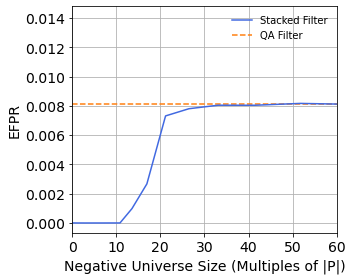

In [24]:
plt.figure(figsize=[5,4])
plt.plot(uniform_data["Negative Universe Size"]/1000000, uniform_data["Total FPR"], color = "royalblue", label="Stacked Filter")
plt.hlines(.0081, xmin=0, xmax=60, color="tab:orange", linestyle="--", label="QA Filter")
plt.ylabel("EFPR", fontsize=14)
plt.xlabel("Negative Universe Size (Multiples of |P|)", fontsize=14)
plt.xlim(xmin=0, xmax=60)
#plt.ylim(ymin=0.004,ymax=.009)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('../Figures/Uniform_Data.pdf', bbox_inches='tight')

In [13]:
pd.read_csv("../Data/inserts2_STACKED.csv")

,Number Of Positive Elements,Negative Sample Size,Zipf Parameter,Negative Universe Size,Number of Known Negatives Available,Number of Known Negatives Chosen,Psi,Bits Available,Equal Fprs,Num Layers,Used Bits,Total FPR,EFPB,Percent Capacity Filled
0,1500000,1000000,0.75,100000000,10000000000,4143604,4.46447,10,0,3,9.7217,0.002446,0.010274,0.75
1,1500000,1000000,0.75,100000000,10000000000,4143604,4.46447,10,0,3,9.7217,0.003230,0.010274,0.80
2,1500000,1000000,0.75,100000000,10000000000,4143604,4.46447,10,0,3,9.7217,0.004220,0.010274,0.85
3,1500000,1000000,0.75,100000000,10000000000,4143604,4.46447,10,0,3,9.7217,0.005436,0.010274,0.90
4,1500000,1000000,0.75,100000000,10000000000,4143604,4.46447,10,0,3,9.7217,0.006885,0.010274,0.95
5,1500000,1000000,0.75,100000000,10000000000,4143604,4.46447,10,0,3,9.7217,0.008631,0.010274,1.00
6,1500000,1000000,0.75,100000000,10000000000,4143604,4.46447,10,0,3,9.7217,0.010682,0.010274,1.05
7,1500000,1000000,0.75,100000000,10000000000,4143604,4.46447,10,0,3,9.7217,0.013011,0.010274,1.10
8,1500000,1000000,0.75,100000000,10000000000,4143604,4.46447,10,0,3,9.7217,0.015647,0.010274,1.15
9,1500000,1000000,0.75,100000000,10000000000,4143604,4.46447,10,0,3,9.7217,0.018646,0.010274,1.20


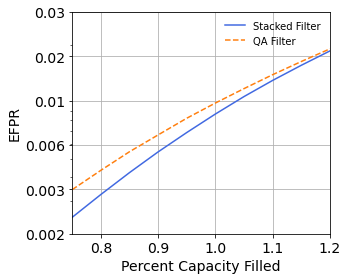

In [12]:
inserts_traditional = pd.read_csv("../Data/inserts2_TRADITIONAL.csv")
inserts_stacked = pd.read_csv("../Data/inserts2_STACKED.csv")
plt.figure(figsize=[5,4])
plt.plot(inserts_stacked["Percent Capacity Filled"], inserts_stacked["Total FPR"], color = "royalblue", label="Stacked Filter")
plt.plot(inserts_traditional["Percent Capacity Filled"], inserts_traditional["Total FPR"], color="tab:orange", linestyle="--", label="QA Filter")
plt.ylabel("EFPR", fontsize=14)
plt.xlabel("Percent Capacity Filled", fontsize=14)
plt.xlim(xmin=.75, xmax=1.2)
#plt.ylim(ymin=0.004,ymax=.009)
plt.grid()
plt.xticks(fontsize=14)
plt.yscale("log")
yticks = np.geomspace(.002, .03, num = 6)
yticks_labels = ['{:0.1g}'.format(x) for x in yticks]
#yticks_labels[2] = '{:0.2g}'.format(yticks[2])
#yticks_labels[3] = '{:0.2g}'.format(yticks[3])
plt.yticks(ticks=yticks, labels=yticks_labels, fontsize=14)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('../Figures/Inserts.pdf', bbox_inches='tight')

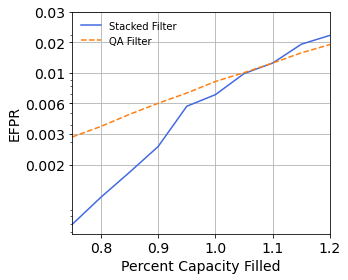

In [10]:
inserts_traditional = pd.read_csv("../Data/inserts_TRADITIONAL_eta_1.csv")
inserts_stacked = pd.read_csv("../Data/inserts2_STACKED_eta_1.csv")
plt.figure(figsize=[5,4])
plt.plot(inserts_stacked["Percent Capacity Filled"], inserts_stacked["Total FPR"], color = "royalblue", label="Stacked Filter")
plt.plot(inserts_traditional["Percent Capacity Filled"], inserts_traditional["Total FPR"], color="tab:orange", linestyle="--", label="QA Filter")
plt.ylabel("EFPR", fontsize=14)
plt.xlabel("Percent Capacity Filled", fontsize=14)
plt.xlim(xmin=.75, xmax=1.2)
#plt.ylim(ymin=0.004,ymax=.009)
plt.grid()
plt.xticks(fontsize=14)
plt.yscale("log")
yticks = np.geomspace(.002, .03, num = 6)
yticks_labels = ['{:0.1g}'.format(x) for x in yticks]
#yticks_labels[2] = '{:0.2g}'.format(yticks[2])
#yticks_labels[3] = '{:0.2g}'.format(yticks[3])
plt.yticks(ticks=yticks, labels=yticks_labels, fontsize=14)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('../Figures/Inserts_eta_1.pdf', bbox_inches='tight')

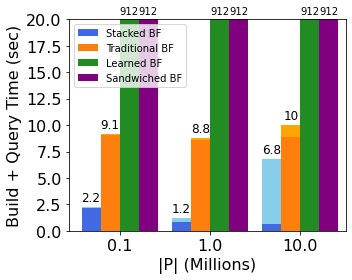

In [21]:
stacked_comp_data = pd.read_csv("../Data/build_and_query_timing_STACKED.csv")
standard_comp_data = pd.read_csv("../Data/build_and_query_timing_TRADITIONAL.csv").iloc[0:3]
num_positives = standard_comp_data["Number Of Positive Elements"]/1000000

trad_comp_time_lookup = standard_comp_data["Lookup Time"]
trad_comp_time_total = trad_comp_time_lookup + standard_comp_data["Construction Time"]

stacked_comp_time_lookup = stacked_comp_data["Lookup Time"]
stacked_comp_time_total = stacked_comp_time_lookup + stacked_comp_data["Construction Time"]

learned_lookup = [126.1, 128.2, 124.4]
learned_total = [912.1, 912.2, 912.4] 

sandwich_learned_lookup = [12.1, 12.2, 12.4]
sandwich_learned_total = [812.1, 812.2, 812.4] 

x = np.arange(len(num_positives))  # the label locations
width = 0.21  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - 3/2 * width, stacked_comp_time_total, width, color="skyblue")
rects2 = ax.bar(x - width/2, trad_comp_time_total, width,color="orange")
rects3 = ax.bar(x + width/2 , learned_total, width, color="limegreen")
rects4 = ax.bar(x + width * 3/2 , learned_total, width, color="pink")
rects5 = ax.bar(x - 3/2 * width, stacked_comp_time_lookup, width, label='Stacked BF', color="royalblue")
rects6 = ax.bar(x - width/2, trad_comp_time_lookup, width, label='Traditional BF', color="tab:orange")
rects7 = ax.bar(x + width/2, learned_lookup, width, label='Learned BF' ,color="forestgreen")
rects8 = ax.bar(x + width * 3/2, learned_lookup, width, label='Sandwiched BF', color="purple")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Build + Query Time (sec)', fontsize=16)
ax.set_xlabel('|P| (Millions)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(num_positives, fontsize=16)
plt.yticks(fontsize=16)
axymax = 20
ax.set_ylim(ymax=axymax)
ax.set_xlim(xmax=2.5)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axymax)
        ax.annotate('{0:.2g}'.format(value, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axymax)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axymax)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)


autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)
autolabel2(rects4)

plt.legend()
fig.tight_layout()
plt.savefig('../Figures/Build_And_Query.pdf', bbox_inches='tight')

plt.show()

-----------------------------URL BLACKLISTING----------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
blacklisting_data = pd.read_csv("../Data/url_blacklisting.csv")
blacklisting_learned_bloom = pd.read_csv("../Data/url_learned_bloom_fpr_sweep.csv")
blacklisting_data_stacked = blacklisting_data
blacklisting_data_50 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]==.5]
blacklisting_data_75 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]==.75]
blacklisting_data_100 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]== 1.02]
blacklisting_data_125 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]== 1.25]

In [ ]:
plt.figure(figsize=[5,4])
plt.plot(bloom_filter_size,bloom_filter_fpr,  label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.plot(blacklisting_learned_bloom["Bits Per Element"],blacklisting_learned_bloom["Total FPR"], label = "Learned Bloom Filter (GPU)", color="tab:green")
plt.plot(blacklisting_data_50["Bits Available"],blacklisting_data_50["Total FPR"], label = "Stacked BF", color="royalblue")
plt.plot(blacklisting_data_75["Bits Available"],blacklisting_data_75["Total FPR"], color="royalblue")
plt.plot(blacklisting_data_100["Bits Available"],blacklisting_data_100["Total FPR"],  color="royalblue")
plt.plot(blacklisting_data_125["Bits Available"],blacklisting_data_125["Total FPR"],  color="royalblue")
plt.yscale("log")
plt.ylabel("False Positive Rate", fontsize=16)
plt.xlabel("Bits Per Positive Element", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlim(xmin=8, xmax=14)
plt.ylim(ymax = .025, ymin=10**-5.5)
plt.legend(frameon=False, prop={'size': 12})
plt.grid()
plt.savefig('../Figures/FPR_vs_Bits_URL.pdf', bbox_inches='tight')
plt.show()

In [13]:
blacklisting_learned_bloom = pd.read_csv("../Data/url_learned_bloom_fpr_sweep_HALF_DATA_2.csv")
blacklisting_sandwiched_bloom = pd.read_csv("../Data/sandwiched_bf_sweep_3.csv")
blacklisting_data_stacked = pd.read_csv("../Data/url_blacklisting_STACKED_HALF_DATA_2.csv")
blacklisting_data_traditional = pd.read_csv("../Data/url_blacklisting_TRADITIONAL.csv")

In [14]:
blacklisting_learned_bloom

,Total FPR,Size of Backup,Bits Per Element,Number of Negatives,Zipf
0,0.089252,4807650,2.850271,5000000,0.75
1,0.016439,9464937,5.568536,5000000,0.75
2,0.006973,11840565,6.955091,5000000,0.75
3,0.003994,13652995,8.012931,5000000,0.75
4,0.002283,15618069,9.159863,5000000,0.75
5,0.001295,17819599,10.444804,5000000,0.75
6,0.000715,20342896,11.917548,5000000,0.75
7,0.000399,22871016,13.393106,5000000,0.75
8,0.000211,25446412,14.896258,5000000,0.75
9,0.000114,27899902,16.328258,5000000,0.75


In [15]:
blacklisting_data_stacked

,Number Of Positive Elements,Negative Universe Size,Number of Known Negatives Available,Number of Known Negatives Chosen,Psi,Bits Available,Equal Fprs,Num Layers,Used Bits,Total FPR,Known FPR,Unknown FPR,Construction Time,Positive Lookup Time,Negative Lookup Time,Filter Checks For Positive,Filter Checks For Negative,EFPB
0,1713331,9824397,5000000,269247,0.708538,4,1,5,3.98014,0.051060,0,0,0.381876,0.348488,0.149697,0,0,NaN
1,1713331,9824397,5000000,1280267,0.825111,5,1,3,4.97441,0.028770,0,0,0.515380,0.351791,0.141969,0,0,NaN
2,1713331,9824397,5000000,1635586,0.852732,6,1,3,5.97011,0.013260,0,0,0.548851,0.361285,0.132193,0,0,NaN
3,1713331,9824397,5000000,3776835,0.929130,7,1,3,6.96395,0.005145,0,0,0.809621,0.367439,0.129704,0,0,NaN
4,1713331,9824397,5000000,4999800,0.952773,8,1,5,7.96080,0.001575,0,0,0.944971,0.386017,0.122990,0,0,NaN
5,1713331,9824397,5000000,4999839,0.952770,9,1,5,8.95500,0.000808,0,0,0.948682,0.395922,0.124380,0,0,NaN
6,1713331,9824397,5000000,4999980,0.952755,10,1,3,9.94951,0.000475,0,0,0.939607,0.397750,0.121546,0,0,NaN
7,1713331,9824397,5000000,4999999,0.952810,11,1,5,10.94560,0.000276,0,0,0.950629,0.407645,0.121371,0,0,NaN
8,1713331,9824397,5000000,4999965,0.952720,12,1,3,11.94000,0.000166,0,0,0.964048,0.422049,0.121544,0,0,NaN
9,1713331,9824397,5000000,4999359,0.952747,13,1,3,12.93490,0.000099,0,0,0.951085,0.416633,0.119081,0,0,NaN


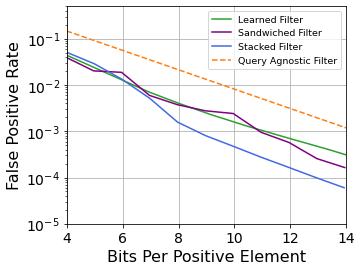

In [7]:
plt.figure(figsize=[5,4])
plt.plot(blacklisting_learned_bloom["Bits Per Element"],blacklisting_learned_bloom["Total FPR"], label = "Learned Filter", color="tab:green")
plt.plot(blacklisting_sandwiched_bloom["Bits Per Element"],blacklisting_sandwiched_bloom["Total FPR"], label = "Sandwiched Filter", color="purple")
plt.plot(blacklisting_data_stacked["Used Bits"],blacklisting_data_stacked["Total FPR"], label = "Stacked Filter", color="royalblue")
# plt.plot(blacklisting_data_traditional["Used Bits"],blacklisting_data_traditional["Total FPR"], label = "Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.plot(bloom_filter_size,bloom_filter_fpr, label = "Query Agnostic Filter", linestyle="--", color="tab:orange")
plt.yscale("log")
plt.ylabel("False Positive Rate", fontsize=16)
plt.xlabel("Bits Per Positive Element", fontsize=16)
plt.xlim(xmin=4, xmax=14)
plt.ylim(ymax = .5, ymin=10**-5)
plt.legend( prop={'size': 9.5})
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('../Figures/FPR_vs_Bits_URL.pdf', bbox_inches='tight')
plt.show()

In [ ]:
blacklisting_data = pd.read_csv("../Data/url_blacklisting_FULLNEGATIVES.csv")
blacklisting_learned_bloom = pd.read_csv("../Data/url_learned_bloom_fpr_sweep_FULLNEGATIVES.csv")
blacklisting_data_stacked = blacklisting_data[blacklisting_data["Num Layers"]==3]
blacklisting_data_50 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]==.5]
blacklisting_data_75 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]==.75]
blacklisting_data_100 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]== 1.02]
blacklisting_data_125 = blacklisting_data_stacked[blacklisting_data_stacked["Zipf Parameter"]== 1.25]

In [ ]:
plt.figure(figsize=[5,4])
plt.plot(bloom_filter_size,bloom_filter_fpr,  label="Traditional Bloom Filter", linestyle="--")
plt.plot(blacklisting_learned_bloom["Bits Per Element"],blacklisting_learned_bloom["Total FPR"], label = "Learned Bloom Filter", color="black")
plt.plot(blacklisting_data_50["Bits Available"],blacklisting_data_50["Total FPR"], label = "Stacked .5 Zipf", color="orange")
plt.plot(blacklisting_data_75["Bits Available"],blacklisting_data_75["Total FPR"], label = "Stacked .75 Zipf", color="green")
plt.plot(blacklisting_data_100["Bits Available"],blacklisting_data_100["Total FPR"], label = "Stacked 1 Zipf", color="blue")
plt.plot(blacklisting_data_125["Bits Available"],blacklisting_data_125["Total FPR"], label = "3-layer 1.25 Zipf", color="purple")
plt.yscale("log")
plt.ylabel("False Positive Rate")
plt.xlabel("Bits Per Positive Element")
plt.xlim(xmin=8, xmax=13.5)
plt.ylim(ymax = .05, ymin=10**-6)
plt.title("Filter Comparison: URL Blacklisting")
plt.legend(ncol=2,prop={'size': 8})
plt.grid()
plt.show()

In [ ]:
bits = ["8","10","12","14"]
stacked_negative_lookup_per_sec = pd.read_csv("../Data/url_blacklisting_stacked_performance.csv")
stacked_negative_lookup_per_sec =  1/(stacked_negative_lookup_per_sec["Negative Lookup Time"])
traditional_negative_lookup_per_sec = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
traditional_negative_lookup_per_sec =  1/(traditional_negative_lookup_per_sec["Negative Lookup Time"])

rae_et_al_lookup_per_sec = [0.107,0.107,0.107,0.107]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
x = np.arange(len(bits))  # the label locations
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width*3/2, stacked_negative_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")

rects2 = ax.bar(x -width/2, traditional_negative_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")

rects3 = ax.bar(x + width/2, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019', color="tab:green")

rects4 = ax.bar(x + width*3/2, cpu_filter_lookup_per_sec, width, label='Learned BF Rae et al. 2019', color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Negative Query Throughput (10^6 QPS)')
ax.set_xlabel('Bits Per Positive Element')
ax.set_xticks(x)
ax.set_xticklabels(bits)
ax.set_ylim(ymax=8.5)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)


autolabel(rects1)
autolabel(rects2)
autolabel2(rects3)
autolabel3(rects4)

fig.tight_layout()

plt.savefig('../Figures/Negative_Queries_URL.pdf', bbox_inches='tight')
plt.show()


In [ ]:
bits = ["8","10","12","14"]
stacked_positive_lookup_per_sec = pd.read_csv("../Data/url_blacklisting_stacked_performance.csv")
stacked_positive_lookup_per_sec =  1/(stacked_positive_lookup_per_sec["Positive Lookup Time"])*(14/100)
traditional_positive_lookup_per_sec = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
traditional_positive_lookup_per_sec =  1/(traditional_positive_lookup_per_sec["Positive Lookup Time"])*(14/100)

rae_et_al_lookup_per_sec = [0.107,0.107,0.107,0.107]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
x = np.arange(len(bits))  # the label locations
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width*3/2, stacked_positive_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")

rects2 = ax.bar(x -width/2, traditional_positive_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")

rects3 = ax.bar(x + width/2, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019', color="tab:green")

rects4 = ax.bar(x + width*3/2, cpu_filter_lookup_per_sec, width, label='Learned BF Rae et al. 2019', color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Positive Query Throughput (10^6 QPS)')
ax.set_xlabel('Bits Per Positive Element')
ax.set_xticks(x)
ax.set_xticklabels(bits)
ax.set_ylim(ymax=8.5)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)


autolabel(rects1)
autolabel(rects2)
autolabel2(rects3)
autolabel3(rects4)


fig.tight_layout()

plt.savefig('../Figures/Positive_Queries_URL.pdf', bbox_inches='tight')
plt.show()


In [8]:

sandwich = pd.read_csv("../Data/sandwiched_bf_sweep_3.csv")
sandwich

,Total FPR,First BF FPR,Second BF FPR,Bits Per Element,Number of Negatives
0,0.039828,0.918348,0.029607,3.954558,5000000
1,0.020170,0.991811,0.016915,4.954558,5000000
2,0.018760,0.865237,0.011859,5.954558,5000000
3,0.005956,0.959524,0.006072,6.954558,5000000
4,0.003750,0.855796,0.004120,7.954558,5000000
5,0.002768,0.773092,0.002799,8.954558,5000000
6,0.002418,0.541236,0.002508,9.954558,5000000
7,0.000948,0.287049,0.002887,10.954558,5000000
8,0.000572,0.200472,0.002577,11.954558,5000000
9,0.000256,0.106475,0.002972,12.954558,5000000


[20.710259019138157, 1.7978902630118399, 24.2, 24.2]


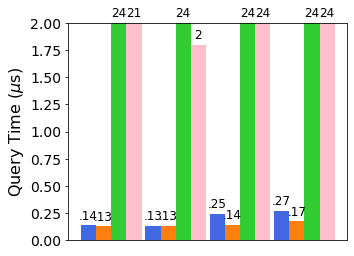

In [9]:
axis_ymax= 2
stacked = pd.read_csv("../Data/url_blacklisting_stacked_performance.csv")
stacked_positive_lookup_per_sec =  (stacked["Positive Lookup Time"])*(100/14)
stacked_negative_lookup_per_sec =  (stacked["Negative Lookup Time"])
traditional = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
traditional_positive_lookup_per_sec =  (traditional["Positive Lookup Time"])*(100/14)
traditional_negative_lookup_per_sec =  (traditional["Negative Lookup Time"])
rae_et_al_lookup_per_sec = [24.2,24.2,24.2,24.2]
sandwich = pd.read_csv("../Data/sandwiched_bf_sweep_3.csv")
sandwich_lookup_per_sec = [24.2*sandwich["First BF FPR"][4], 24.2*sandwich["First BF FPR"][10], 24.2, 24.2]
print(sandwich_lookup_per_sec)

traditional_lookup_per_sec = [traditional_negative_lookup_per_sec[1], 
                              traditional_negative_lookup_per_sec[3],
                              traditional_positive_lookup_per_sec[1],
                              traditional_positive_lookup_per_sec[3]]
stacked_lookup_per_sec = [stacked_negative_lookup_per_sec[1],
                          stacked_negative_lookup_per_sec[3],
                          stacked_positive_lookup_per_sec[1],
                          stacked_positive_lookup_per_sec[3]]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
x = np.arange(4)  # the label locations
width = 0.235 # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - 3*width/2, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")

rects2 = ax.bar(x - width/2, traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")

rects3 = ax.bar(x + width/2, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")

rects4 = ax.bar(x + 3*width/2, sandwich_lookup_per_sec, width, label='Sandwich Learned BF', color="pink")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Query Time ($\mu$s)',fontsize=16)
ax.set_ylim(ymax=axis_ymax)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.2f}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.3f}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel(rects1)
autolabel(rects2)
autolabel2(rects3)
autolabel2(rects4)

plt.tick_params(
    axis='x',  
    which='both',
    bottom=False,
    top=False,        
    labelbottom=False)
plt.yticks(fontsize=14)

#fig.tight_layout()

plt.savefig('../Figures/Comp_Performance_URL.pdf', bbox_inches='tight')


In [ ]:
f, (ax2, ax) = plt.subplots(2, 1, sharex=True,figsize=[5,4])
bottom_axis_ymax = .3
top_axis_ymax = 25
top_axis_ymin = 22

# plot the same data on both axesstacked = pd.read_csv("../Data/url_blacklisting_stacked_performance.csv")
stacked_positive_lookup_per_sec =  (stacked["Positive Lookup Time"])*(100/14)
stacked_negative_lookup_per_sec =  (stacked["Negative Lookup Time"])
traditional = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
traditional_positive_lookup_per_sec =  (traditional["Positive Lookup Time"])*(100/14)
traditional_negative_lookup_per_sec =  (traditional["Negative Lookup Time"])

traditional_lookup_per_sec = [traditional_negative_lookup_per_sec[1], 
                              traditional_negative_lookup_per_sec[3],
                              traditional_positive_lookup_per_sec[1],
                              traditional_positive_lookup_per_sec[3]]
stacked_lookup_per_sec = [stacked_negative_lookup_per_sec[1],
                          stacked_negative_lookup_per_sec[3],
                          stacked_positive_lookup_per_sec[1],
                          stacked_positive_lookup_per_sec[3]]
rae_et_al_lookup_per_sec = [24.2,24.2,24.2,24.2]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
x = np.arange(4)  # the label locations
width = 0.3 # the width of the bars

rects1 = ax.bar(x - width, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")
rects3 = ax.bar(x + width, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")
rects1_2 = ax2.bar(x - width, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2_2 = ax2.bar(x , traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")
rects3_2 = ax2.bar(x + width, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
f.text(-.06, 0.5,r'Query Time ($\mu$s)', va='center', rotation='vertical', fontsize=16)

ax.set_yticks([.05,.15,.25])
ax.set_ylim(ymax=bottom_axis_ymax)
ax2.set_ylim(ymin=top_axis_ymin, ymax=top_axis_ymax)
ax.tick_params(axis='y',labelsize=16,labeltop='off')
ax2.tick_params(axis='y',labelsize=16,labeltop='off')

ax.set_xticks([])
ax.set_xticklabels(bits, fontsize=16)
ax.tick_params(axis='x', top="off",labeltop='off')  # don't put tick labels at the top
ax.xaxis.tick_bottom()
ax2.xaxis.tick_top()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel1(rects1)
autolabel1(rects2)
autolabel0(rects3_2)



# hide the spines between ax and ax2
ax2.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
f.subplots_adjust(hspace=0.07)
# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

fig.tight_layout()
plt.savefig('../Figures/Comp_Performance_URL.pdf', bbox_inches='tight')
plt.show()

In [ ]:
bits = ["8","10","12","14"]
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/stacked_url_perf.csv")
standard_comp_data = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
positive_fraction = 0
positive_lookups = 1000000*positive_fraction
negative_lookups = 1000000*(1-positive_fraction)
trad_false_positives = negative_lookups*standard_comp_data["Total FPR"]
stacked_false_positives = negative_lookups*stacked_comp_data["Total FPR"]
learned_false_positives = negative_lookups*np.array([0.004159, 0.001813, 0.000744, 0.000423])
sandwiched_false_positives = negative_lookups*np.array([0.003642, 0.001516, 0.000512, 0.000168])
sandwiched_proportion_model_lookups = np.array([0.855, 0.541, 0.200, 0.0742])
network_time_per_lookup = 1/1000

trad_comp_time_total = (positive_lookups)*(standard_comp_data["Positive Lookup Time"]/1000000+network_time_per_lookup)
trad_comp_time_total += (negative_lookups)*(standard_comp_data["Negative Lookup Time"]/1000000)+trad_false_positives*network_time_per_lookup
trad_comp_time_disk = (positive_lookups)*(network_time_per_lookup)
trad_comp_time_disk += trad_false_positives*network_time_per_lookup

stacked_comp_time_total = (positive_lookups)*(stacked_comp_data["Positive Lookup Time"]/1000000+network_time_per_lookup)
stacked_comp_time_total += (negative_lookups)*(stacked_comp_data["Negative Lookup Time"]/1000000)+stacked_false_positives*network_time_per_lookup
stacked_comp_time_disk = (positive_lookups)*(network_time_per_lookup)
stacked_comp_time_disk += stacked_false_positives*network_time_per_lookup

learned_comp_time_total = (positive_lookups)*((1/107000)*sandwiched_proportion_model_lookups+network_time_per_lookup)
learned_comp_time_total += (negative_lookups)*((1/107000)*sandwiched_proportion_model_lookups)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = (positive_lookups)*(network_time_per_lookup)
learned_comp_time_disk += learned_false_positives*network_time_per_lookup

x = np.arange(len(bits))  # the label locations
width = 0.31  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x, trad_comp_time_disk, width ,color="red")
rects5 = ax.bar(x + width, learned_comp_time_disk, width, color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Filter + RAID Access ($\mu$s)', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymax=25)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2g}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)

fig.tight_layout()
plt.savefig('../Figures/Queries_RAID_HDD.pdf', bbox_inches='tight')

plt.show()


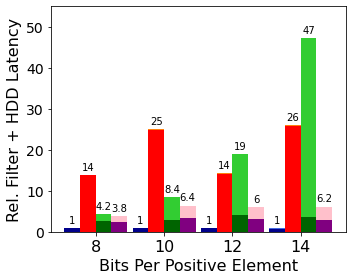

In [10]:
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/disk_performance_STACKED_HDD_v2.csv")
standard_comp_data = pd.read_csv("../Data/disk_performance_TRADITIONAL_HDD_v2.csv")
negative_lookups = standard_comp_data["Sample Size"]
learned_false_positives = negative_lookups*np.array([0.003994, 0.001295, 0.000715, 0.000211])
sandwiched_false_positives = negative_lookups*np.array([0.003642, 0.001516, 0.000512, 0.000168])
sandwiched_proportion_model_lookups = np.array([0.855, 0.541, 0.200, 0.0742])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*negative_lookups)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups
learned_comp_time_disk = learned_comp_time_disk/negative_lookups

sandwich_comp_time_total = (negative_lookups)*(.0000242)*sandwiched_proportion_model_lookups+sandwiched_false_positives*network_time_per_lookup
sandwich_comp_time_disk = sandwiched_false_positives*network_time_per_lookup
sandwich_comp_time_total = sandwich_comp_time_total/negative_lookups
sandwich_comp_time_disk = sandwich_comp_time_disk/negative_lookups

# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
sandwich_comp_time_total = sandwich_comp_time_total/stacked_comp_time_total
sandwich_comp_time_disk = sandwich_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total


x = np.arange(len(bits))  # the label locations
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - 3*width/2, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x - width/2, trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width/2, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x + 3*width/2, sandwich_comp_time_total, width, label='Sandwiched Bloom Filter',color="pink")
rects5 = ax.bar(x - 3*width/2, stacked_comp_time_disk, width, color="darkblue")
rects6 = ax.bar(x - width/2, trad_comp_time_disk, width ,color="red")
rects7 = ax.bar(x + width/2, learned_comp_time_disk, width, color="darkgreen")
rects8 = ax.bar(x + 3*width/2, sandwich_comp_time_disk, width, color="purple")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + HDD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=14)
ax.set_ylim(ymax=55)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2g}'.format(height, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=10)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height
        ()
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel1(rects1)
autolabel1(rects2)
autolabel1(rects3)
autolabel1(rects4)

fig.tight_layout()
plt.savefig('../Figures/URL_Queries_HDD.pdf', bbox_inches='tight')

plt.show()

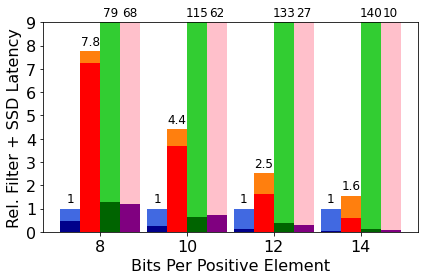

In [12]:
axis_ymax= 9
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/disk_performance_STACKED_SSD.csv")
standard_comp_data = pd.read_csv("../Data/disk_performance_TRADITIONAL_SSD.csv")
negative_lookups = standard_comp_data["Sample Size"]
learned_false_positives = negative_lookups*np.array([0.003994, 0.001295, 0.000715, 0.000211])
sandwiched_false_positives = negative_lookups*np.array([0.003642, 0.001516, 0.000512, 0.000168])
sandwiched_proportion_model_lookups = np.array([0.855, 0.541, 0.200, 0.0742])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*negative_lookups)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups
learned_comp_time_disk = learned_comp_time_disk/negative_lookups

sandwich_comp_time_total = (negative_lookups)*(.0000242)*sandwiched_proportion_model_lookups+sandwiched_false_positives*network_time_per_lookup
sandwich_comp_time_disk = sandwiched_false_positives*network_time_per_lookup
sandwich_comp_time_total = sandwich_comp_time_total/negative_lookups
sandwich_comp_time_disk = sandwich_comp_time_disk/negative_lookups

# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
sandwich_comp_time_total = sandwich_comp_time_total/stacked_comp_time_total
sandwich_comp_time_disk = sandwich_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total


x = np.arange(len(bits))  # the label locations
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=[6,4])

rects1 = ax.bar(x - 3*width/2, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x - width/2, trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width/2, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x + 3*width/2, sandwich_comp_time_total, width, label='Sandwiched Bloom Filter',color="pink")
rects5 = ax.bar(x - 3*width/2, stacked_comp_time_disk, width, color="darkblue")
rects6 = ax.bar(x - width/2, trad_comp_time_disk, width ,color="red")
rects7 = ax.bar(x + width/2, learned_comp_time_disk, width, color="darkgreen")
rects8 = ax.bar(x + 3*width/2, sandwich_comp_time_disk, width, color="purple")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + SSD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymin=0,ymax=axis_ymax)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.2g}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)
autolabel2(rects4)

fig.tight_layout()
plt.savefig('../Figures/URL_Queries_SSD.pdf', bbox_inches='tight')

plt.show()

In [ ]:
f, (ax2, ax) = plt.subplots(2, 1, sharex=True,figsize=[5,4])
bottom_axis_ymax = 12
top_axis_ymax = 160
top_axis_ymin = 70

# plot the same data on both axes
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/disk_performance_STACKED_SSD.csv")
standard_comp_data = pd.read_csv("../Data/disk_performance_TRADITIONAL_SSD.csv")
negative_lookups = 1000000
microseconds_to_seconds = 1000000
learned_false_positives = negative_lookups*np.array([0.003994, 0.001295, 0.000715, 0.000211])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*1000000)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups*microseconds_to_seconds
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups*microseconds_to_seconds

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups*microseconds_to_seconds
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups*microseconds_to_seconds

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups*microseconds_to_seconds
learned_comp_time_disk = learned_comp_time_disk/negative_lookups*microseconds_to_seconds


# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total

x = np.arange(len(bits))  # the label locations
width = 0.31  # the width of the bars

rects1 = ax.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width,[min(x,bottom_axis_ymax) for x in learned_comp_time_total], width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5 = ax.bar(x, trad_comp_time_disk, width ,color="red")
rects5 = ax.bar(x + width, [min(x,bottom_axis_ymax) for x in learned_comp_time_disk], width, color="darkgreen")
rects1_2 = ax2.bar(x - width, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2_2 = ax2.bar(x , trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3_2 = ax2.bar(x + width, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4_2 = ax2.bar(x - width, stacked_comp_time_disk, width, color="darkblue")
rects5_2 = ax2.bar(x, trad_comp_time_disk, width ,color="red")
rects5_2 = ax2.bar(x + width, learned_comp_time_disk, width, color="darkgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
f.text(0.5, 0.,  'Bits Per Positive Element', ha='center', fontsize=16)
f.text(-.03, 0.5,r'Rel. Filter + SSD Latency', va='center', rotation='vertical', fontsize=16)


ax2.set_yticks([75, 100, 125, 150])
ax.set_yticks([3,6,9])
ax.set_ylim(ymax=bottom_axis_ymax)
ax2.set_ylim(ymin=top_axis_ymin, ymax=top_axis_ymax)
ax.tick_params(axis='y',labelsize=16,labeltop='off')
ax2.tick_params(axis='y',labelsize=16,labeltop='off')

ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
ax.tick_params(axis='x', top="off",labeltop='off')  # don't put tick labels at the top
ax.xaxis.tick_bottom()
ax2.xaxis.tick_top()

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2g}'.format(height, style="plain").lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{0:.3g}'.format(height, style="plain"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    style="normal",
                    ha='center', va='bottom', fontsize=12)

autolabel1(rects1)
autolabel1(rects2)
autolabel0(rects3_2)



# hide the spines between ax and ax2
ax2.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
f.subplots_adjust(hspace=0.07)
# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

fig.tight_layout()
plt.savefig('../Figures/URL_Queries_SSD.pdf', bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=[5,4])
stacked_comp_data = pd.read_csv("../Data/stacked_url_perf.csv")
standard_comp_data = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
positive_fraction = 1
positive_lookups = 1000000*positive_fraction
negative_lookups = 1000000*(1-positive_fraction)
trad_false_positives = negative_lookups*standard_comp_data["Total FPR"]
stacked_false_positives = negative_lookups*stacked_comp_data["Total FPR"]
learned_false_positives = negative_lookups*np.array([0.004159, 0.001813, 0.000744, 0.000423])

bits_index = 1

trad_false_positive_rate = trad_false_positives[bits_index]
stacked_false_positive_rate = stacked_false_positives[bits_index]
learned_false_positive_rate = learned_false_positives[bits_index]
workload_cost = 1/np.geomspace(1,1000000, 20)
trad_comp_time = []
stacked_comp_time = []
learned_comp_time = []
learned_comp_cpu_time = []

for i in range(len(workload_cost)):
    trad_pos_comp_time = (positive_lookups)*(standard_comp_data["Positive Lookup Time"][bits_index]/1000000+workload_cost[i])
    trad_neg_comp_time = (negative_lookups)*(standard_comp_data["Negative Lookup Time"][bits_index]/1000000)+trad_false_positive_rate*workload_cost[i]
    trad_comp_time.append(trad_pos_comp_time+trad_neg_comp_time)
                          
    stacked_pos_comp_time = (positive_lookups)*(stacked_comp_data["Positive Lookup Time"][bits_index]/1000000+workload_cost[i])
    stacked_neg_comp_time = (negative_lookups)*(stacked_comp_data["Negative Lookup Time"][bits_index]/1000000)+stacked_false_positive_rate*workload_cost[i]
    stacked_comp_time.append(stacked_pos_comp_time+stacked_neg_comp_time)

    learned_neg_comp_time = (positive_lookups)*((1/107000)+workload_cost[i])
    learned_pos_comp_time = (negative_lookups)*((1/107000))+learned_false_positive_rate*workload_cost[i]
    learned_comp_time.append(learned_pos_comp_time+learned_neg_comp_time)

    learned_neg_cpu_comp_time = (positive_lookups)*((1/4000)+workload_cost[i])
    learned_pos_cpu_comp_time = (negative_lookups)*((1/4000))+learned_false_positive_rate*workload_cost[i]
    learned_comp_cpu_time.append(learned_pos_cpu_comp_time+learned_neg_cpu_comp_time)

plt.plot(workload_cost, np.array(trad_comp_time)/1000000, label="Traditional Filter", color="tab:orange", ls="--")
plt.plot(workload_cost, np.array(stacked_comp_time)/1000000, label="Stacked Filter", color="royalblue")
plt.plot(workload_cost, np.array(learned_comp_time)/1000000, label="Learned Filter", color="tab:green")
plt.plot(workload_cost, np.array(learned_comp_cpu_time)/1000000, color="tab:green")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Computation Time (seconds)")
plt.xlabel("Cost Per Data Access")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=[5,4])
stacked_comp_data = pd.read_csv("../Data/stacked_url_perf.csv")
standard_comp_data = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
positive_fraction = 0
positive_lookups = 1000000*positive_fraction
negative_lookups = 1000000*(1-positive_fraction)
trad_false_positives = negative_lookups*standard_comp_data["Total FPR"]
stacked_false_positives = negative_lookups*stacked_comp_data["Total FPR"]
learned_false_positives = negative_lookups*np.array([0.003831,0.001646, 0.001012, 0.000735])

bits_index = 1

trad_false_positive_rate = trad_false_positives[bits_index]
stacked_false_positive_rate = stacked_false_positives[bits_index]
learned_false_positive_rate = learned_false_positives[bits_index]
workload_cost = 1/np.geomspace(1,1000000, 20)
trad_comp_time = []
stacked_comp_time = []
learned_comp_time = []
learned_comp_cpu_time = []

for i in range(len(workload_cost)):
    trad_pos_comp_time = (positive_lookups)*(standard_comp_data["Positive Lookup Time"][bits_index]/1000000+workload_cost[i])
    trad_neg_comp_time = (negative_lookups)*(standard_comp_data["Negative Lookup Time"][bits_index]/1000000)+trad_false_positive_rate*workload_cost[i]
    trad_comp_time.append(trad_pos_comp_time+trad_neg_comp_time)
                          
    stacked_pos_comp_time = (positive_lookups)*(stacked_comp_data["Positive Lookup Time"][bits_index]/1000000+workload_cost[i])
    stacked_neg_comp_time = (negative_lookups)*(stacked_comp_data["Negative Lookup Time"][bits_index]/1000000)+stacked_false_positive_rate*workload_cost[i]
    stacked_comp_time.append(stacked_pos_comp_time+stacked_neg_comp_time)

    learned_neg_comp_time = (positive_lookups)*((1/107000)+workload_cost[i])
    learned_pos_comp_time = (negative_lookups)*((1/107000))+learned_false_positive_rate*workload_cost[i]
    learned_comp_time.append(learned_pos_comp_time+learned_neg_comp_time)

    learned_neg_cpu_comp_time = (positive_lookups)*((1/4000)+workload_cost[i])
    learned_pos_cpu_comp_time = (negative_lookups)*((1/4000))+learned_false_positive_rate*workload_cost[i]
    learned_comp_cpu_time.append(learned_pos_cpu_comp_time+learned_neg_cpu_comp_time)

plt.plot(workload_cost, np.array(trad_comp_time)/1000000, label="Traditional Filter", color="tab:orange", ls="--")
plt.plot(workload_cost, np.array(stacked_comp_time)/1000000, label="Stacked Filter", color="royalblue")
plt.plot(workload_cost, np.array(learned_comp_time)/1000000, label="Learned Filter", color="tab:green")
plt.plot(workload_cost, np.array(learned_comp_cpu_time)/1000000, color="tab:green")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Computation Time (seconds)")
plt.xlabel("Cost Per Data Access")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=[5,4])
stacked_comp_data = pd.read_csv("../Data/stacked_url_perf.csv")
standard_comp_data = pd.read_csv("../Data/url_blacklisting_standard_performance.csv")
trad_comp_time = []
stacked_comp_time = []
learned_comp_time = []
positive_fraction = np.linspace(10**-6,.1,200)
workload_cost = 1/1000
bits_index = 1

for i in range(len(positive_fraction)):
    positive_lookups = 1000000*positive_fraction[i]
    negative_lookups = 1000000*(1-positive_fraction)[i]
    trad_false_positives = negative_lookups*standard_comp_data["Total FPR"]
    stacked_false_positives = negative_lookups*stacked_comp_data["Total FPR"]
    learned_false_positives = negative_lookups*np.array([0.003831,0.001646, 0.001012, 0.000735])
    trad_false_positive_rate = trad_false_positives[bits_index]
    stacked_false_positive_rate = stacked_false_positives[bits_index]
    learned_false_positive_rate = learned_false_positives[bits_index]
    
    trad_pos_comp_time = (positive_lookups)*(standard_comp_data["Positive Lookup Time"][bits_index]/1000000+workload_cost)
    trad_neg_comp_time = (negative_lookups)*(standard_comp_data["Negative Lookup Time"][bits_index]/1000000)+trad_false_positive_rate*workload_cost
    trad_comp_time.append(trad_pos_comp_time+trad_neg_comp_time)
                          
    stacked_pos_comp_time = (positive_lookups)*(stacked_comp_data["Positive Lookup Time"][bits_index]/1000000+workload_cost)
    stacked_neg_comp_time = (negative_lookups)*(stacked_comp_data["Negative Lookup Time"][bits_index]/1000000)+stacked_false_positive_rate*workload_cost
    stacked_comp_time.append(stacked_pos_comp_time+stacked_neg_comp_time)

    learned_neg_comp_time = (positive_lookups)*((1/107000)+workload_cost)
    learned_pos_comp_time = (negative_lookups)*((1/107000))+learned_false_positive_rate*workload_cost
    learned_comp_time.append(learned_pos_comp_time+learned_neg_comp_time)

plt.plot(positive_fraction, np.array(trad_comp_time), label="Traditional Filter", color="tab:orange", ls="--")
plt.plot(positive_fraction, np.array(stacked_comp_time), label="Stacked Filter", color="royalblue")
plt.plot(positive_fraction, np.array(learned_comp_time), label="Learned Filter", color="tab:green")
plt.ylabel(r'Computation Time ($\mu$s)')
plt.xlabel("Percent Positive Queries")
plt.legend()
plt.savefig('../Figures/Percent_Positives.pdf', bbox_inches='tight')
plt.show()

In [ ]:
number_of_negs_stacked_01 = pd.read_csv("../Data/url_blacklisting_stacked_comparison_010.csv")
number_of_negs_learned_01 = pd.read_csv("../Data/url_learned_bloom_beta_sweep_09_29.csv")

In [ ]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
number_of_negs_learned_01["Classifier FPR"] =number_of_negs_learned_01["Total FPR"] -.005
number_of_negs_learned_01["False Negatives"] = number_of_negs_learned_01["Size of Backup"]/(np.log(1/.005)/np.log(2)**2) 
number_of_negs_learned_01["Adjusted Backup Size"] = number_of_negs_learned_01["False Negatives"]*(-np.log(.01-number_of_negs_learned_01["Classifier FPR"])/np.log(2)**2) 
number_of_negs_learned_01["Adjusted Bits Per Element"] = (number_of_negs_learned_01["Adjusted Backup Size"]+2353*32)/140000

In [ ]:
plt.hlines(9.6,min(number_of_negs_stacked_01["Number of Known Negatives Available"]),max(number_of_negs_stacked_01["Number of Known Negatives Available"]), label = "Traditional Bloom Filter", ls="--")
plt.plot(number_of_negs_stacked_01["Number of Known Negatives Available"],number_of_negs_stacked_01["Used Bits"], label = "Stacked Bloom Filter", color="green")
plt.plot(number_of_negs_learned_01["Number of Negatives"],number_of_negs_learned_01["Adjusted Bits Per Element"], label = "Learned Bloom Filter", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Negative Elements Available")
plt.xscale("log")
plt.title("Stacked Filter Vs Learned Filter at 1% FPR")
plt.legend(loc=(.5,.7))
plt.show()

In [ ]:
number_of_negs_stacked_005 = pd.read_csv("../Data/url_blacklisting_stacked_comparison_005.csv")
number_of_negs_learned_005 = pd.read_csv("../Data/url_learned_bloom_beta_sweep_09_29_005.csv")

In [ ]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
number_of_negs_learned_005["Classifier FPR"] =number_of_negs_learned_005["Total FPR"] -.0025
number_of_negs_learned_005["False Negatives"] = number_of_negs_learned_005["Size of Backup"]/(np.log(1/.0025)/np.log(2)**2) 
number_of_negs_learned_005["Adjusted Backup Size"] = number_of_negs_learned_005["False Negatives"]*(-np.log(.005-number_of_negs_learned_005["Classifier FPR"])/np.log(2)**2) 
number_of_negs_learned_005["Adjusted Bits Per Element"] = (number_of_negs_learned_005["Adjusted Backup Size"]+2353*32)/140000

In [ ]:
plt.hlines(11.05,min(number_of_negs_stacked_005["Number of Known Negatives Available"]),max(number_of_negs_stacked_005["Number of Known Negatives Available"]), label = "Traditional Bloom Filter", ls="--")
plt.plot(number_of_negs_stacked_005["Number of Known Negatives Available"],number_of_negs_stacked_005["Used Bits"], label = "Stacked Bloom Filter", color="green")
plt.plot(number_of_negs_learned_005["Number of Negatives"],number_of_negs_learned_005["Bits Per Element"], label = "Learned Bloom Filter", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Negative Elements Available")
plt.xscale("log")
plt.title("Stacked Filter Vs Learned Filter at .5% FPR")
plt.legend(loc=(.5,.7))
plt.show()

In [ ]:
number_of_negs_stacked_001 = pd.read_csv("../Data/url_blacklisting_stacked_comparison_001.csv")
number_of_negs_learned_001 = pd.read_csv("../Data/url_learned_bloom_beta_sweep_09_29_001.csv")

In [ ]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
number_of_negs_learned_001["Classifier FPR"] = number_of_negs_learned_001["Total FPR"] -.0005
number_of_negs_learned_001["False Negatives"] = number_of_negs_learned_001["Size of Backup"]/(np.log(1/.0005)/np.log(2)**2)
number_of_negs_learned_001["Adjusted Backup Size"] = number_of_negs_learned_001["False Negatives"]*(-np.log(.001-number_of_negs_learned_001["Classifier FPR"])/np.log(2)**2) 
number_of_negs_learned_001["Adjusted Bits Per Element"] = (number_of_negs_learned_001["Adjusted Backup Size"]+2353*32)/140000

In [ ]:
plt.hlines(14.5,min(number_of_negs_stacked_001["Number of Known Negatives Available"]),max(number_of_negs_stacked_001["Number of Known Negatives Available"]), label = "Traditional Bloom Filter", ls="--")
plt.plot(number_of_negs_stacked_001["Number of Known Negatives Available"],number_of_negs_stacked_001["Used Bits"], label = "Stacked Bloom Filter", color="green")
plt.plot(number_of_negs_learned_001["Number of Negatives"],number_of_negs_learned_001["Adjusted Bits Per Element"], label = "Learned Bloom Filter", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Negative Elements Available")
plt.xscale("log")
plt.title("Stacked Filter Vs Learned Filter at .1% FPR")
plt.legend(loc=(.5,.7))
plt.show()

In [ ]:
zipf_stacked_01 = pd.read_csv("../Data/url_blacklisting_stacked_comparison_zipf_sweep_01.csv")
zipf_learned_01 = pd.read_csv("../Data/url_learned_bloom_zipf_sweep_01.csv")

In [ ]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
zipf_learned_01["Classifier FPR"] = zipf_learned_01["Total FPR"] -.005
zipf_learned_01["False Negatives"] = zipf_learned_01["Size of Backup"]/(np.log(1/.005)/np.log(2)**2)
zipf_learned_01["Adjusted Backup Size"] = zipf_learned_01["False Negatives"]*(-np.log(.01-zipf_learned_01["Classifier FPR"])/np.log(2)**2) 
zipf_learned_01["Adjusted Bits Per Element"] = (zipf_learned_01["Adjusted Backup Size"]+2353*32)/140000

In [ ]:
plt.hlines(9.6,min(zipf_stacked_01["Zipf Parameter"]),max(zipf_stacked_01["Zipf Parameter"]), label = "Traditional Bloom Filter", ls="--")
plt.plot(zipf_stacked_01["Zipf Parameter"],zipf_stacked_01["Used Bits"], label = "Stacked Bloom Filter", color="green")
plt.plot(zipf_learned_01["Zipf"],zipf_learned_01["Adjusted Bits Per Element"], label = "Learned Bloom Filter", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Zipf Parameter")
plt.xlim(xmax=1.05, xmin=-.05)
plt.title("Stacked Filter Vs Learned Filter at 1% FPR")
plt.legend(loc=(0.05,0.2))
plt.show()

In [ ]:
zipf_stacked_005 = pd.read_csv("../Data/url_blacklisting_stacked_comparison_zipf_sweep_005.csv")
zipf_learned_005 = pd.read_csv("../Data/url_learned_bloom_zipf_sweep_005.csv")

In [ ]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
zipf_learned_005["Classifier FPR"] = zipf_learned_005["Total FPR"] -.0025
zipf_learned_005["False Negatives"] = zipf_learned_005["Size of Backup"]/(np.log(1/.0025)/np.log(2)**2)
zipf_learned_005["Adjusted Backup Size"] = zipf_learned_005["False Negatives"]*(-np.log(.005-zipf_learned_005["Classifier FPR"])/np.log(2)**2) 
zipf_learned_005["Adjusted Bits Per Element"] = (zipf_learned_005["Adjusted Backup Size"]+2353*32)/140000

In [ ]:
plt.hlines(11.05,min(zipf_stacked_005["Zipf Parameter"]),max(zipf_stacked_005["Zipf Parameter"]), label = "Traditional Bloom Filter", ls="--")
plt.plot(zipf_stacked_005["Zipf Parameter"],zipf_stacked_005["Used Bits"], label = "Stacked Bloom Filter", color="green")
plt.plot(zipf_learned_005["Zipf"],zipf_learned_005["Adjusted Bits Per Element"], label = "Learned Bloom Filter", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Zipf Parameter")
plt.xlim(xmax=1.05, xmin=-.05)
plt.title("Stacked Filter Vs Learned Filter at .05% FPR")
plt.legend(loc=(0.05,0.15))
plt.show()

In [ ]:
zipf_stacked_001 = pd.read_csv("../Data/url_blacklisting_stacked_comparison_zipf_sweep_001.csv")
zipf_learned_001 = pd.read_csv("../Data/url_learned_bloom_zipf_sweep_001.csv")

In [ ]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
zipf_learned_001["Classifier FPR"] = zipf_learned_001["Total FPR"] -.0025
zipf_learned_001["False Negatives"] = zipf_learned_001["Size of Backup"]/(np.log(1/.0025)/np.log(2)**2)
zipf_learned_001["Adjusted Backup Size"] = zipf_learned_001["False Negatives"]*(-np.log(.001-zipf_learned_001["Classifier FPR"])/np.log(2)**2) 
zipf_learned_001["Adjusted Bits Per Element"] = (zipf_learned_001["Adjusted Backup Size"]+2353*32)/140000

In [ ]:
plt.hlines(14.5,min(zipf_stacked_001["Zipf Parameter"]),max(zipf_stacked_001["Zipf Parameter"]), label = "Traditional Bloom Filter", ls="--")
plt.plot(zipf_stacked_001["Zipf Parameter"],zipf_stacked_001["Used Bits"], label = "Stacked Bloom Filter", color="green")
plt.plot(zipf_learned_001["Zipf"],zipf_learned_001["Adjusted Bits Per Element"], label = "Learned Bloom Filter", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Zipf Parameter")
plt.xlim(xmax=1.05, xmin=-.05)
plt.title("Stacked Filter Vs Learned Filter at .1% FPR")
plt.legend(loc=(0.05,0.05))
plt.show()

In [ ]:
swap_learned_01 = pd.read_csv("../Data/url_learned_bloom_learnability_sweep.csv")

In [ ]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
swap_learned_01["Classifier FPR"] = swap_learned_01["Total FPR"] -.005
swap_learned_01["False Negatives"] = swap_learned_01["Size of Backup"]/(np.log(1/.005)/np.log(2)**2)
swap_learned_01["Adjusted Backup Size"] = swap_learned_01["False Negatives"]*(-np.log(.01-swap_learned_01["Classifier FPR"])/np.log(2)**2) 
swap_learned_01["Adjusted Bits Per Element"] = (swap_learned_01["Adjusted Backup Size"]+2353*32)/140000

In [ ]:
plt.figure(figsize=[5,4])
plt.hlines(9.6, xmin=0, xmax=10, label = "Traditional BF", ls="--", color="tab:orange")
plt.hlines(8, xmin=0, xmax=10, label = "Stacked BF", color="royalblue")
plt.plot(swap_learned_01["Percent Positives Swapped"]*100,swap_learned_01["Adjusted Bits Per Element"], label = "Learned BF", color="tab:green")
plt.ylabel("Bits Per Positive Element", fontsize=16)
plt.xlabel("Elements Swapped (%)", fontsize=16)
plt.xlim(xmax=10, xmin=0)
plt.legend(prop={'size':14}, frameon=False)
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('../Figures/learnability_URL.pdf', bbox_inches='tight')
plt.show()

In [ ]:
swap_learned_001 = pd.read_csv("../Data/url_learned_bloom_learnability_sweep_001.csv")

In [ ]:
### Adjusting the backup's false positive rate/size with respect to the particular false positive rate of the classifier for a given distribution.
swap_learned_001["Classifier FPR"] = swap_learned_001["Total FPR"] -.0005
swap_learned_001["False Negatives"] = swap_learned_001["Size of Backup"]/(np.log(1/.0005)/np.log(2)**2)
swap_learned_001["Adjusted Backup Size"] = swap_learned_001["False Negatives"]*(-np.log(.001-swap_learned_001["Classifier FPR"])/np.log(2)**2) 
swap_learned_001["Adjusted Bits Per Element"] = (swap_learned_001["Adjusted Backup Size"]+2353*32)/140000

In [ ]:
plt.figure(figsize=[5,4])
plt.hlines(14.25, xmin=0, xmax=.1, label = "Traditional BF", ls="--")
plt.hlines(8, xmin=0, xmax=.1, label = "Stacked BF", color="green")
plt.plot(swap_learned_001["Percent Positives Swapped"],swap_learned_001["Adjusted Bits Per Element"], label = "Learned BF", color="red")
plt.ylabel("Bits Per Positive Element")
plt.xlabel("Percent Swapped")
plt.xlim(xmax=0.1, xmin=0)
plt.title("Learned Filter Robustness")
plt.legend(loc="center right")
plt.show()

--------------------------------CQF INTEGER EXPERIMENTS------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
cqf_fpr = np.array([.025,.01,.001,.0001])
cqf_size = (np.log2(1/cqf_fpr)+2.125)/.95

In [ ]:
three_filter_cqf = pd.read_csv("../Data/cqf_data_10_05_modulo.csv")
one_layer_cqf = pd.read_csv("../Data/cqf_data_standard.csv")

In [ ]:
three_filter_cqf_00 = three_filter_cqf[three_filter_cqf["Zipf Parameter"]== 0]
three_filter_cqf_50 = three_filter_cqf[three_filter_cqf["Zipf Parameter"]==.5]
three_filter_cqf_75 = three_filter_cqf[three_filter_cqf["Zipf Parameter"]==.75]
three_filter_cqf_1 = three_filter_cqf[three_filter_cqf["Zipf Parameter"]==1.02]
three_filter_cqf_125 = three_filter_cqf[three_filter_cqf["Zipf Parameter"]==1.25]

In [ ]:
plt.figure(figsize=[5,4])
plt.plot(one_layer_cqf["Bits Available"], one_layer_cqf["Total FPR"], label="Traditional Quotient Filter", linestyle="--",color="tab:orange")
plt.plot(three_filter_cqf_50["Bits Available"],three_filter_cqf_50["Total FPR"], label = "Stacked Quotient Filter", color="royalblue")
plt.plot(three_filter_cqf_75["Bits Available"],three_filter_cqf_75["Total FPR"], color="royalblue")
plt.plot(three_filter_cqf_1["Bits Available"],three_filter_cqf_1["Total FPR"], color="royalblue")
plt.plot(three_filter_cqf_125["Bits Available"],three_filter_cqf_125["Total FPR"], color="royalblue")
plt.plot(learned_bloom_size,learned_bloom_fpr, label="Learned Bloom Filter",  color="tab:green")
plt.yscale("log")
plt.ylabel("False Positive Rate",fontsize=16)
plt.xlim(xmin=8, xmax=14)
plt.ylim(ymax = .05, ymin=10**-5.5)
#plt.legend(loc="lower left", prop={'size':11}, frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.xlabel("Bits Per Positive Element",fontsize=16)
plt.savefig('../Figures/FPR_vs_Bits_CQF.pdf', bbox_inches='tight')
plt.show()

In [ ]:
bits = ["8","10","12","14"]
stacked_negative_lookup_per_sec = pd.read_csv("../Data/cqf_performance_stacked_10_06.csv")
stacked_negative_lookup_per_sec =  1/(stacked_negative_lookup_per_sec["Negative Lookup Time"])
standard_negative_lookup_per_sec = pd.read_csv("../Data/cqf_performance_standard_10_06.csv")
standard_negative_lookup_per_sec =  1/(standard_negative_lookup_per_sec["Negative Lookup Time"])

x = np.arange(len(bits))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_negative_lookup_per_sec, width, label='Stacked CQF', color="royalblue")
rects2 = ax.bar(x + width/2, standard_negative_lookup_per_sec, width, label='Traditional CQF',color="tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Negative Throughput (10^6 QPS)', fontsize=13)
ax.set_ylim(ymax=25)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


plt.tick_params(
    axis='x',  
    which='both',
    bottom=False,
    top=False,        
    labelbottom=False)
plt.savefig('../Figures/Negative_Queries_CQF.pdf', bbox_inches='tight')
plt.show()


In [ ]:
bits = ["8","10","12","14"]
stacked_positive_lookup_per_sec = pd.read_csv("../Data/cqf_performance_stacked_10_06.csv")
stacked_positive_lookup_per_sec =  1/(stacked_positive_lookup_per_sec["Positive Lookup Time"])
standard_positive_lookup_per_sec = pd.read_csv("../Data/cqf_performance_standard_10_06.csv")
standard_positive_lookup_per_sec =  1/(standard_positive_lookup_per_sec["Positive Lookup Time"])


x = np.arange(len(bits))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_positive_lookup_per_sec, width, label='Stacked CQF', color="royalblue")
rects2 = ax.bar(x + width/2, standard_positive_lookup_per_sec, width, label='Traditional CQF',color="tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Positive  Throughput (10^6 QPS)', fontsize=13)
ax.set_xlabel('Bits Per Positive Element', fontsize=13)
ax.set_xticks(x)
ax.set_ylim(ymax=25)
ax.set_xticklabels(bits)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig('../Figures/Positive_Queries_CQF.pdf', bbox_inches='tight')

plt.show()


In [ ]:
plt.figure(figsize=[15,12])
plt.plot(cqf_size, cqf_fpr, label="Traditional CQF", color="black", linestyle="-")
plt.plot(three_filter_cqf_50["Bits Available"],three_filter_cqf_50["Total FPR"], label = "Stacked CQF .5 Zipf", color="orange")
plt.plot(three_filter_cqf_75["Bits Available"],three_filter_cqf_75["Total FPR"], label = "Stacked CQF .75 Zipf", color="green")
plt.plot(three_filter_cqf_1["Bits Available"],three_filter_cqf_1["Total FPR"], label = "Stacked CQF 1 Zipf", color="blue")
plt.plot(three_filter_bloom_50["Bits Available"],three_filter_bloom_50["Total FPR"], label = "Stacked Bloom .5 Zipf", color="orange", linestyle="--")
plt.plot(three_filter_bloom_75["Bits Available"],three_filter_bloom_75["Total FPR"], label = "Stacked Bloom .75 Zipf", color="green", linestyle="--")
plt.plot(three_filter_bloom_1["Bits Available"],three_filter_bloom_1["Total FPR"], label = "Stacked Bloom 1 Zipf", color="blue", linestyle="--")
plt.yscale("log")
plt.ylabel("False Positive Rate")
plt.xlabel("Bits Per Positive Element")
plt.xlim(xmin=8, xmax=14)
plt.title("Filter Comparison: 32-Bit Integers")
plt.legend(ncol=2, prop={'size':12})
plt.grid()
plt.show()

----------------------------- CUCKOO FILTER INTEGER EXPERIMENTS ------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
cf_fpr = np.array([.025,.01,.001,.0001])
cf_size = (np.log2(1/cf_fpr)+3)/.95

In [ ]:
three_filter_cf = pd.read_csv("../Data/cuckoo_data_fixed.csv")
one_layer_cf = pd.read_csv("../Data/cuckoo_data_fixed_standard.csv")

In [ ]:
three_filter_cf_00 = three_filter_cf[three_filter_cf["Zipf Parameter"]== 0]
three_filter_cf_50 = three_filter_cf[three_filter_cf["Zipf Parameter"]==.5]
three_filter_cf_75 = three_filter_cf[three_filter_cf["Zipf Parameter"]==.75]
three_filter_cf_1 = three_filter_cf[three_filter_cf["Zipf Parameter"]==1.02]
three_filter_cf_125 = three_filter_cf[three_filter_cf["Zipf Parameter"]==1.25]

In [ ]:
plt.figure(figsize=[5,4])
plt.plot(one_layer_cf["Bits Available"], one_layer_cf["Total FPR"], label="Traditional Cuckoo Filter", linestyle="--", color="tab:orange")
plt.plot(three_filter_cf_50["Bits Available"],three_filter_cf_50["Total FPR"], label = "Stacked Cuckoo Filter", color="royalblue")
plt.plot(three_filter_cf_75["Bits Available"],three_filter_cf_75["Total FPR"], color="royalblue")
plt.plot(three_filter_cf_1["Bits Available"],three_filter_cf_1["Total FPR"], color="royalblue")
plt.plot(three_filter_cf_125["Bits Available"],three_filter_cf_125["Total FPR"], color="royalblue")
plt.plot(learned_bloom_size,learned_bloom_fpr, label="Learned Bloom Filter",  color="tab:green")
plt.yscale("log")
plt.ylabel("False Positive Rate", fontsize=16)
plt.xlabel("Bits Per Positive Element", fontsize=16)
plt.xlim(xmin=8, xmax=14)
plt.ylim(ymax = .05, ymin=10**-5.5)
#plt.legend(loc="lower left", prop={'size':11}, frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('../Figures/FPR_vs_Bits_CF.pdf', bbox_inches='tight')
plt.show()

In [ ]:
bits = ["8","10","12","14"]
stacked_negative_lookup_per_sec = pd.read_csv("../Data/cuckoo_performance_fixed_stacked.csv")
stacked_negative_lookup_per_sec =  1/(stacked_negative_lookup_per_sec["Negative Lookup Time"])*(950000/1000000)
standard_negative_lookup_per_sec = pd.read_csv("../Data/cuckoo_performance_fixed_standard.csv")
standard_negative_lookup_per_sec =  1/(standard_negative_lookup_per_sec["Negative Lookup Time"])*(950000/1000000)

learned_filter_lookup_per_sec = [0.107,0.107,0.107,0.107]
x = np.arange(len(bits))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_negative_lookup_per_sec, width, label='Stacked CF', color="royalblue")

rects2 = ax.bar(x +width/2, standard_negative_lookup_per_sec, width, label='Traditional CF', color="tab:orange")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Negative Throughput (10^6 QPS)', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(bits)
ax.set_ylim(ymax=55)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



plt.tick_params(
    axis='x',  
    which='both',
    bottom=False,
    top=False,        
    labelbottom=False)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('../Figures/Negative_Queries_CF.pdf', bbox_inches='tight')
plt.show()


In [ ]:
bits = ["8","10","12","14"]
stacked_positive_lookup_per_sec = pd.read_csv("../Data/cuckoo_performance_fixed_stacked.csv")
stacked_positive_lookup_per_sec =  1/(stacked_positive_lookup_per_sec["Positive Lookup Time"])*(950000/1000000)
standard_positive_lookup_per_sec = pd.read_csv("../Data/cuckoo_performance_fixed_standard.csv")
standard_positive_lookup_per_sec =  1/(standard_positive_lookup_per_sec["Positive Lookup Time"])*(950000/1000000)

learned_filter_lookup_per_sec = [0.107,0.107,0.107,0.107]
x = np.arange(len(bits))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])
rects1 = ax.bar(x - width/2, stacked_positive_lookup_per_sec, width, label='Stacked CF', color="royalblue")

rects2 = ax.bar(x + width/2, standard_positive_lookup_per_sec, width, label='Traditional CF', color="tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Positive Throughput (10^6 QPS)', fontsize=13)
ax.set_xlabel('Bits Per Positive Element', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(bits)
ax.set_ylim(ymax=55)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig('../Figures/Positive_Queries_CF.pdf', bbox_inches='tight')

plt.show()


--------------------------------------- FireHose Experiments --------------------------------------------------------------------------------------------------------------------------------------------

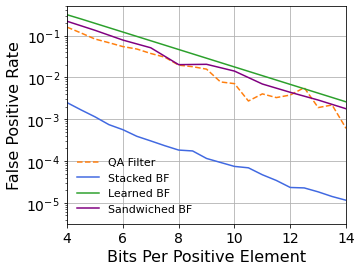

In [5]:
one_layer_bloom = pd.read_csv("../Data/firehose_fpr_vs_bits_TRADITIONAL.csv")
three_layer_bloom = pd.read_csv("../Data/firehose_fpr_vs_bits_STACKED.csv")
learned_bloom = pd.read_csv("../Data/learned_bloom_firehose_data_2.csv")
sandwich_bloom = pd.read_csv("../Data/sandwich_firehose_sweep.csv")
bloom_filter_fpr = np.geomspace(.021, .001, 15)
bloom_filter_size = 1.44*np.log2(1/bloom_filter_fpr)
bloom_filter_fpr_linear = np.linspace(.03, .002, 15)
bloom_filter_size_linear = 1.44*np.log2(1/bloom_filter_fpr_linear)

plt.figure(figsize=[5,4])
plt.plot(one_layer_bloom["Bits Available"], one_layer_bloom["Total FPR"], label="QA Filter", linestyle="--", color="tab:orange")
plt.plot(three_layer_bloom["Bits Available"],three_layer_bloom["Total FPR"], label = "Stacked BF", color="royalblue")
plt.plot(learned_bloom["Bits Per Element"],learned_bloom["Total FPR"], label = "Learned BF", color="tab:green")
plt.plot(sandwich_bloom["Bits Per Element"],sandwich_bloom["Total FPR"], label = "Sandwiched BF", color="purple")
plt.yscale("log")
plt.ylabel("False Positive Rate", fontsize=16)
plt.xlabel("Bits Per Positive Element", fontsize=16)
plt.xlim(xmin=4, xmax=14)
plt.ylim(ymax = .5, ymin=10**-5.5)
plt.legend(loc="lower left", prop={'size':11}, frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('../Figures/FPR_vs_Bits_Firehose.pdf', bbox_inches='tight')
plt.show()

In [6]:
one_layer_bloom

,Number Of Positive Elements,Sample Size,Positive Rate,Negative Universe Size,Number of Known Negatives Available,Number of Known Negatives Chosen,Psi,Bits Available,Equal Fprs,Num Layers,Used Bits,Total FPR,Known FPR,Unknown FPR,Construction Time,Lookup Time,Filter Time,Disk Time,EFPB
0,10000,100000,0,90000,10000,0,0,4.0,0,1,4.0075,0.159427,NaN,0.146246,0.000312,0.003326,0.003326,0,0.146342
1,10000,100000,0,90000,10000,0,0,4.5,0,1,4.5800,0.115522,NaN,0.115039,0.000375,0.003496,0.003496,0,0.115090
2,10000,100000,0,90000,10000,0,0,5.0,0,1,5.0303,0.082835,NaN,0.090564,0.000379,0.003399,0.003399,0,0.090513
3,10000,100000,0,90000,10000,0,0,5.5,0,1,5.5038,0.067616,NaN,0.071322,0.000379,0.003316,0.003316,0,0.071184
4,10000,100000,0,90000,10000,0,0,6.0,0,1,6.0594,0.054633,NaN,0.056050,0.000438,0.003501,0.003501,0,0.055982
5,10000,100000,0,90000,10000,0,0,6.5,0,1,6.5210,0.047745,NaN,0.044079,0.000445,0.003458,0.003458,0,0.044027
6,10000,100000,0,90000,10000,0,0,7.0,0,1,7.0019,0.037366,NaN,0.034621,0.000445,0.003402,0.003402,0,0.034625
7,10000,100000,0,90000,10000,0,0,7.5,0,1,7.5454,0.030521,NaN,0.027295,0.000508,0.003575,0.003575,0,0.027231
8,10000,100000,0,90000,10000,0,0,8.0,0,1,8.0149,0.019654,NaN,0.021413,0.000504,0.003464,0.003464,0,0.021416
9,10000,100000,0,90000,10000,0,0,8.5,0,1,8.5009,0.018046,NaN,0.016848,0.000505,0.003335,0.003335,0,0.016842


In [7]:
three_layer_bloom 

,Number Of Positive Elements,Sample Size,Positive Rate,Negative Universe Size,Number of Known Negatives Available,Number of Known Negatives Chosen,Psi,Bits Available,Equal Fprs,Num Layers,Used Bits,Total FPR,Known FPR,Unknown FPR,Construction Time,Lookup Time,Filter Time,Disk Time,EFPB
0,10000,100000,0,90000,10000,4609,0.989836,4.0,0,5,3.99528,0.002497,0.000229,0.243546,0.000914,0.004915,0.004915,0,0.267306
1,10000,100000,0,90000,10000,7148,0.992439,4.5,0,5,4.49333,0.001674,0.000145,0.222060,0.001035,0.004720,0.004720,0,0.250033
2,10000,100000,0,90000,10000,7299,0.992540,5.0,0,5,4.99060,0.001143,0.000143,0.152257,0.001070,0.004469,0.004469,0,0.166849
3,10000,100000,0,90000,10000,9381,0.993791,5.5,0,5,5.47983,0.000743,0.000114,0.118410,0.001144,0.004098,0.004098,0,0.130198
4,10000,100000,0,90000,10000,9992,0.994065,6.0,0,7,5.97873,0.000563,0.000100,0.094543,0.001352,0.004126,0.004126,0,0.125169
5,10000,100000,0,90000,10000,9999,0.994074,6.5,0,5,6.47426,0.000391,0.000100,0.065850,0.001235,0.003885,0.003885,0,0.070330
6,10000,100000,0,90000,10000,9999,0.994096,7.0,0,5,6.97201,0.000303,0.000100,0.051757,0.001262,0.003926,0.003926,0,0.055067
7,10000,100000,0,90000,10000,9999,0.994083,7.5,0,5,7.47069,0.000233,0.000100,0.038858,0.001237,0.003810,0.003810,0,0.041234
8,10000,100000,0,90000,10000,9999,0.994070,8.0,0,5,7.96663,0.000183,0.000100,0.030708,0.001221,0.003537,0.003537,0,0.032044
9,10000,100000,0,90000,10000,9999,0.994091,8.5,0,7,8.41300,0.000175,0.000100,0.029998,0.001124,0.003557,0.003557,0,0.031258


In [10]:

sandwich_bloom

,Total FPR,First BF FPR,Second BF FPR,Bits Per Element,Number of Negatives
0,0.220007,0.636173,0.050449,4.0,20000
1,0.133855,0.614063,0.618503,5.0,20000
2,0.078138,0.523057,0.175989,6.0,20000
3,0.051123,0.415486,0.017845,7.0,20000
4,0.020196,0.701839,0.034275,8.0,20000
5,0.020582,0.279549,0.618503,9.0,20000
6,0.014167,0.324089,0.618503,10.0,20000
7,0.006954,0.441465,0.008445,11.0,20000
8,0.004406,0.433181,0.000096,12.0,20000
9,0.002880,0.341291,0.618503,13.0,20000


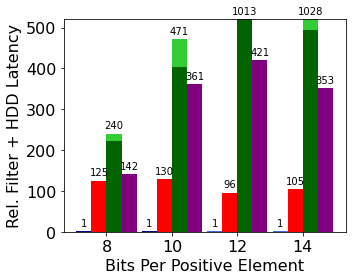

In [36]:
axis_ymax = 520
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/firehose_disk_performance_STACKED_HDD_v4.csv")
standard_comp_data = pd.read_csv("../Data/firehose_disk_performance_TRADITIONAL_HDD_v4.csv")
negative_lookups = standard_comp_data["Sample Size"][0]
learned_false_positives = negative_lookups*np.array([0.031498,0.015791,0.007916,0.0025])
sandwiched_false_positives = negative_lookups*np.array([0.020196, 0.014167, 0.004406, 0.001781])
sandwiched_proportion_model_lookups = np.array([.007, .0025, .001, .0004])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*negative_lookups)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups
learned_comp_time_disk = learned_comp_time_disk/negative_lookups

sandwich_comp_time_total = (negative_lookups)*(.0000242)*sandwiched_proportion_model_lookups+sandwiched_false_positives*network_time_per_lookup
sandwich_comp_time_disk = sandwiched_false_positives*network_time_per_lookup
sandwich_comp_time_total = sandwich_comp_time_total/negative_lookups
sandwich_comp_time_disk = sandwich_comp_time_disk/negative_lookups

# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
sandwich_comp_time_total = sandwich_comp_time_total/stacked_comp_time_total
sandwich_comp_time_disk = sandwich_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total


x = np.arange(len(bits))  # the label locations
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])

rects1 = ax.bar(x - 3*width/2, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x - width/2, trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width/2, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x + 3*width/2, sandwich_comp_time_total, width, label='Sandwiched Bloom Filter',color="pink")
rects5 = ax.bar(x - 3*width/2, stacked_comp_time_disk, width, color="darkblue")
rects6 = ax.bar(x - width/2, trad_comp_time_disk, width ,color="red")
rects7 = ax.bar(x + width/2, learned_comp_time_disk, width, color="darkgreen")
rects8 = ax.bar(x + 3*width/2, sandwich_comp_time_disk, width, color="purple")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + HDD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymin=0,ymax=axis_ymax)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.3g}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)


autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)
autolabel2(rects4)


fig.tight_layout()
plt.savefig('../Figures/Firehose_Queries_HDD.pdf', bbox_inches='tight')

plt.show()

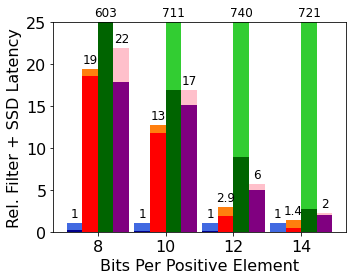

In [25]:
axis_ymax = 25
bits = ["8","10","12","14"]
stacked_comp_data = pd.read_csv("../Data/firehose_disk_performance_STACKED_SSD_v2.csv")
standard_comp_data = pd.read_csv("../Data/firehose_disk_performance_TRADITIONAL_SSD_v2.csv")
negative_lookups = standard_comp_data["Sample Size"][0]
learned_false_positives = negative_lookups*np.array([0.031498,0.015791,0.007916,0.0025])
rae_et_al_lookup_per_sec = [24.2,24.2,24.2,24.2]
sandwiched_false_positives = negative_lookups*np.array([0.020196, 0.014167, 0.004406, 0.001781])
sandwiched_proportion_model_lookups = np.array([.007, .0025, .001, .0004])
network_time_per_lookup = standard_comp_data["Disk Time"][0]/(standard_comp_data["Total FPR"][0]*negative_lookups)

trad_comp_time_total = standard_comp_data["Lookup Time"]/negative_lookups
trad_comp_time_disk = standard_comp_data["Disk Time"]/negative_lookups

stacked_comp_time_total = stacked_comp_data["Lookup Time"]/negative_lookups
stacked_comp_time_disk = stacked_comp_data["Disk Time"]/negative_lookups

learned_comp_time_total = (negative_lookups)*(.0000242)+learned_false_positives*network_time_per_lookup
learned_comp_time_disk = learned_false_positives*network_time_per_lookup
learned_comp_time_total = learned_comp_time_total/negative_lookups
learned_comp_time_disk = learned_comp_time_disk/negative_lookups

sandwich_comp_time_total = (negative_lookups)*(.0000242)*sandwiched_proportion_model_lookups+sandwiched_false_positives*network_time_per_lookup
sandwich_comp_time_disk = sandwiched_false_positives*network_time_per_lookup
sandwich_comp_time_total = sandwich_comp_time_total/negative_lookups
sandwich_comp_time_disk = sandwich_comp_time_disk/negative_lookups

# Normalize by stacked_comp_time_total
trad_comp_time_total = trad_comp_time_total/stacked_comp_time_total
trad_comp_time_disk = trad_comp_time_disk/stacked_comp_time_total
learned_comp_time_total = learned_comp_time_total/stacked_comp_time_total
learned_comp_time_disk = learned_comp_time_disk/stacked_comp_time_total
sandwich_comp_time_total = sandwich_comp_time_total/stacked_comp_time_total
sandwich_comp_time_disk = sandwich_comp_time_disk/stacked_comp_time_total
stacked_comp_time_disk = stacked_comp_time_disk/stacked_comp_time_total
stacked_comp_time_total = stacked_comp_time_total/stacked_comp_time_total


x = np.arange(len(bits))  # the label locations
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=[5,4])

rects1 = ax.bar(x - 3*width/2, stacked_comp_time_total, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x - width/2, trad_comp_time_total, width, label='Traditional Bloom Filter',color="tab:orange")
rects3 = ax.bar(x + width/2, learned_comp_time_total, width, label='Learned Bloom Filter',color="limegreen")
rects4 = ax.bar(x + 3*width/2, sandwich_comp_time_total, width, label='Sandwiched Bloom Filter',color="pink")
rects5 = ax.bar(x - 3*width/2, stacked_comp_time_disk, width, color="darkblue")
rects6 = ax.bar(x - width/2, trad_comp_time_disk, width ,color="red")
rects7 = ax.bar(x + width/2, learned_comp_time_disk, width, color="darkgreen")
rects8 = ax.bar(x + 3*width/2, sandwich_comp_time_disk, width, color="purple")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Rel. Filter + SSD Latency', fontsize=16)
ax.set_xlabel('Bits Per Positive Element', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(bits, fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(ymin=0,ymax=axis_ymax)

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.2g}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)
autolabel2(rects4)


fig.tight_layout()
plt.savefig('../Figures/Firehose_Queries_SSD.pdf', bbox_inches='tight')

plt.show()

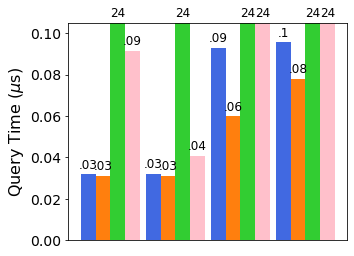

In [59]:
f, (ax) = plt.subplots(figsize=[5,4])
axis_ymax = .105

# plot the same data on both axes
stacked = pd.read_csv("../Data/firehose_comp_3.csv")
stacked_positive_lookup_per_sec =  (stacked["Positive Lookup Time"])*1000000/9996
stacked_negative_lookup_per_sec =  (stacked["Negative Lookup Time"])
traditional = pd.read_csv("../Data/firehose_comp_1.csv")
traditional_positive_lookup_per_sec =  (traditional["Positive Lookup Time"])*1000000/9996
traditional_negative_lookup_per_sec =  (traditional["Negative Lookup Time"])
sandwich_lookup_per_sec = [24.2*.0025+traditional_negative_lookup_per_sec[0], 24.2*.0004+traditional_negative_lookup_per_sec[0], 24.2, 24.2]

traditional_lookup_per_sec = [traditional_negative_lookup_per_sec[1], 
                              traditional_negative_lookup_per_sec[3],
                              traditional_positive_lookup_per_sec[1],
                              traditional_positive_lookup_per_sec[3]]
stacked_lookup_per_sec = [stacked_negative_lookup_per_sec[1],
                          stacked_negative_lookup_per_sec[3],
                          stacked_positive_lookup_per_sec[1],
                          stacked_positive_lookup_per_sec[3]]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
rae_et_al_lookup_per_sec = [24.2,24.2,24.2,24.2]
x = np.arange(4)  # the label locations
width = 0.225 # the width of the bars

rects1 = ax.bar(x - 3*width/2, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")

rects2 = ax.bar(x - width/2, traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")

rects3 = ax.bar(x + width/2, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")

rects4 = ax.bar(x + 3*width/2, sandwich_lookup_per_sec, width, label='Sandwich Learned BF', color="pink")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Query Time ($\mu$s)',fontsize=16)
ax.set_ylim(ymax=axis_ymax)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.2f}'.format(value).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        ax.annotate('{0:.0f}'.format(value).lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height()
        height = min(value, axis_ymax)
        if(value<1):
            ax.annotate('{0:.1g}'.format(value).lstrip("0"),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=12)
        else:
            ax.annotate('{0:.2g}'.format(value).lstrip("0"),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=12)
            


autolabel(rects1)
autolabel(rects2)
autolabel2(rects3)
autolabel3(rects4)

plt.tick_params(
    axis='x',  
    which='both',
    bottom=False,
    top=False,        
    labelbottom=False)
plt.yticks(fontsize=14)
plt.savefig('../Figures/Comp_Performance_Firehose.pdf', bbox_inches='tight')

In [ ]:
f, (ax2, ax) = plt.subplots(2, 1, sharex=True,figsize=[5,4])
bottom_axis_ymax = .12
top_axis_ymax = 25
top_axis_ymin = 22.1

# plot the same data on both axesstacked = pd.read_csv("../Data/url_blacklisting_stacked_performance.csv")stacked = pd.read_csv("../Data/firehose_comp_3.csv")
stacked = pd.read_csv("../Data/firehose_comp_3.csv")
stacked_positive_lookup_per_sec =  (stacked["Positive Lookup Time"])*1000000/9996
stacked_negative_lookup_per_sec =  (stacked["Negative Lookup Time"])
traditional = pd.read_csv("../Data/firehose_comp_1.csv")
traditional_positive_lookup_per_sec =  (traditional["Positive Lookup Time"])*1000000/9996
traditional_negative_lookup_per_sec =  (traditional["Negative Lookup Time"])


traditional_lookup_per_sec = [traditional_negative_lookup_per_sec[1], 
                              traditional_negative_lookup_per_sec[3],
                              traditional_positive_lookup_per_sec[1],
                              traditional_positive_lookup_per_sec[3]]
stacked_lookup_per_sec = [stacked_negative_lookup_per_sec[1],
                          stacked_negative_lookup_per_sec[3],
                          stacked_positive_lookup_per_sec[1],
                          stacked_positive_lookup_per_sec[3]]
rae_et_al_lookup_per_sec = [24.2,24.2,24.2,24.2]
cpu_filter_lookup_per_sec = [0.003,0.003,0.003,0.003]
x = np.arange(4)  # the label locations
width = 0.3 # the width of the bars

rects1 = ax.bar(x - width, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2 = ax.bar(x , traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")
rects3 = ax.bar(x + width, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")
rects1_2 = ax2.bar(x - width, stacked_lookup_per_sec, width, label='Stacked Bloom Filter', color="royalblue")
rects2_2 = ax2.bar(x , traditional_lookup_per_sec, width, label='Traditional Bloom Filter', color="tab:orange")
rects3_2 = ax2.bar(x + width, rae_et_al_lookup_per_sec, width, label='Learned BF Rae et al. 2019 (GPU)', color="limegreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
f.text(-.06, 0.5,r'Query Time ($\mu$s)', va='center', rotation='vertical', fontsize=16)

#ax.set_yticks([.025,.05,.075,.1])
ax.set_ylim(ymax=bottom_axis_ymax)
ax2.set_ylim(ymin=top_axis_ymin, ymax=top_axis_ymax)
ax.tick_params(axis='y',labelsize=16,labeltop='off')
ax2.tick_params(axis='y',labelsize=16,labeltop='off')

ax.set_xticks([])
ax.set_xticklabels(bits, fontsize=16)
ax.tick_params(axis='x', top="off",labeltop='off')  # don't put tick labels at the top
ax.xaxis.tick_bottom()
ax2.xaxis.tick_top()

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1g}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def autolabel3(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height).strip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel1(rects1)
autolabel1(rects2)
autolabel0(rects3_2)



# hide the spines between ax and ax2
ax2.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
f.subplots_adjust(hspace=0.07)
# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

fig.tight_layout()
plt.savefig('../Figures/Comp_Performance_Firehose.pdf', bbox_inches='tight')
plt.show()

----------------------------------------------------------Adaptive Experiments---------------------------------------------------------------------------------------------------------------

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_ssd_10_10mil_v1.csv")
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(4,5))

ylabels = ('ASF', 'QA')
y_pos = np.arange(len(ylabels))
row_idx = 0

cold_construction = [adaptive_data["Cold Construction Adaptive"].iloc[row_idx], adaptive_data["Construction Traditional"].iloc[row_idx]]
cold_lookup = [adaptive_data["Cold Lookup Adaptive"].iloc[row_idx], adaptive_data["Lookup Traditional"].iloc[row_idx]]
cold_disk = [adaptive_data["Cold Disk Adaptive"].iloc[row_idx], adaptive_data["Disk Traditional"].iloc[row_idx]]
warm_construction = [adaptive_data["Warm Construction Adaptive"].iloc[row_idx], 0]
warm_lookup = [adaptive_data["Warm Lookup Adaptive"].iloc[row_idx], 0]
warm_disk = [adaptive_data["Warm Disk Adaptive"].iloc[row_idx], 0]

ax.bar(y_pos, cold_construction, align='center', color="skyblue", label=R'Building $L_1$' )
ax.bar(y_pos, cold_lookup, bottom=cold_construction, align='center', color="blue", label=R'Filter (1-Layer)')
ax.bar(y_pos, cold_disk, bottom=np.array(cold_construction)+np.array(cold_lookup), align='center', color="darkblue", label=R'Disk (1-Layer)')
ax.bar(y_pos, warm_construction, bottom=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk), align='center', color="orange", label=R'Building $L_3$')
ax.bar(y_pos, warm_lookup,  bottom=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction), align='center', color="red", label=R'Filter (3-Layer)')
ax.bar(y_pos, warm_disk, bottom=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction)+np.array(warm_lookup), align='center', color="maroon", label="Disk (3-Layer)")
ax.set_xticks(y_pos)
ax.set_xticklabels(ylabels, fontsize=14)
#ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylabel(r'Latency on $10^7$ SSD Queries (Sec)', fontsize=14)
ax.set_title(r'ASF vs Query-Agnostic', fontsize=14)
plt.yticks(rotation=90, va="center", fontsize=14)
plt.ylim(ymax=6.7)
plt.legend(loc="upper left",ncol=1)
plt.savefig('../Figures/adaptive_SSD_lifecycle.pdf', bbox_inches='tight')
plt.show()

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_ssd_10_10mil_v1.csv")
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(14,2))

ylabels = ('ASF', 'BF')
y_pos = np.arange(len(ylabels))
row_idx = 0

cold_construction = [adaptive_data["Cold Construction Adaptive"].iloc[row_idx], adaptive_data["Construction Traditional"].iloc[row_idx]]
cold_lookup = [adaptive_data["Cold Lookup Adaptive"].iloc[row_idx], adaptive_data["Lookup Traditional"].iloc[row_idx]]
cold_disk = [adaptive_data["Cold Disk Adaptive"].iloc[row_idx], adaptive_data["Disk Traditional"].iloc[row_idx]]
warm_construction = [adaptive_data["Warm Construction Adaptive"].iloc[row_idx], 0]
warm_lookup = [adaptive_data["Warm Lookup Adaptive"].iloc[row_idx], 0]
warm_disk = [adaptive_data["Warm Disk Adaptive"].iloc[row_idx], 0]

ax.barh(y_pos, cold_construction, align='center', color="royalblue", label="Cold Construction")
ax.barh(y_pos, cold_lookup, left=cold_construction, align='center', color="blue", label="Cold Filter Lookups")
ax.barh(y_pos, cold_disk, left=np.array(cold_construction)+np.array(cold_lookup), align='center', color="darkblue", label="Cold Disk Reads")
ax.barh(y_pos, warm_construction, left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk), align='center', color="crimson", label="Warm Construction")
ax.barh(y_pos, warm_lookup,  left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction), align='center', color="red", label="Warm Filter Lookups")
ax.barh(y_pos, warm_disk, left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction)+np.array(warm_lookup), align='center', color="darkred", label="Warm Disk Reads")
ax.set_yticks(y_pos)
ax.set_yticklabels(ylabels)
ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Latency (Sec)')
ax.set_title('Adaptive Stacked Filters vs Traditional Bloom Filter on 10 Million SSD Queries', fontsize=14)
plt.yticks(rotation=90, va="center", fontsize=14)
plt.xlim(xmax=7)
plt.legend(ncol=2)
plt.savefig('../Figures/adaptive_SSD_lifecycle.pdf', bbox_inches='tight')
plt.show()

In [ ]:
adaptive_data

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_SSD_8_v5mil.csv")
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(14,5))

ylabels = ('Adaptive SF', 'Traditional Filter')
y_pos = np.arange(len(ylabels))
row_idx = 0

cold_construction = [adaptive_data["Cold Construction Adaptive"].iloc[row_idx], adaptive_data["Construction Traditional"].iloc[row_idx]]
cold_lookup = [adaptive_data["Cold Lookup Adaptive"].iloc[row_idx], adaptive_data["Lookup Traditional"].iloc[row_idx]]
cold_disk = [adaptive_data["Cold Disk Adaptive"].iloc[row_idx], adaptive_data["Disk Traditional"].iloc[row_idx]]
warm_construction = [adaptive_data["Warm Construction Adaptive"].iloc[row_idx], 0]
warm_lookup = [adaptive_data["Warm Lookup Adaptive"].iloc[row_idx], 0]
warm_disk = [adaptive_data["Warm Disk Adaptive"].iloc[row_idx], 0]

ax.barh(y_pos, cold_construction, align='center', color="royalblue", label="Cold Construction")
ax.barh(y_pos, cold_lookup, left=cold_construction, align='center', color="blue", label="Cold Filter Lookups")
ax.barh(y_pos, cold_disk, left=np.array(cold_construction)+np.array(cold_lookup), align='center', color="darkblue", label="Cold Disk Reads")
ax.barh(y_pos, warm_construction, left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk), align='center', color="crimson", label="Warm Construction")
ax.barh(y_pos, warm_lookup,  left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction), align='center', color="red", label="Warm Filter Lookups")
ax.barh(y_pos, warm_disk, left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction)+np.array(warm_lookup), align='center', color="darkred", label="Warm Disk Reads")
ax.set_yticks(y_pos)
ax.set_yticklabels(ylabels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Latency (Sec)')
ax.set_title('Adaptive Stacked Filters vs Traditional Filter on 5 Million SSD Queries')
plt.yticks(rotation=90, va="center")
plt.xlim(xmax=9)
plt.legend()
plt.savefig('../Figures/adaptive_SSD_lifecycle_5mil.pdf', bbox_inches='tight')
plt.show()

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_HDD_10_v1.csv")
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(14,2))

ylabels = ('ASF', 'BF')
y_pos = np.arange(len(ylabels))
row_idx = 0

cold_construction = [adaptive_data["Cold Construction Adaptive"].iloc[row_idx], adaptive_data["Construction Traditional"].iloc[row_idx]]
cold_lookup = [adaptive_data["Cold Lookup Adaptive"].iloc[row_idx], adaptive_data["Lookup Traditional"].iloc[row_idx]]
cold_disk = [adaptive_data["Cold Disk Adaptive"].iloc[row_idx], adaptive_data["Disk Traditional"].iloc[row_idx]]
warm_construction = [adaptive_data["Warm Construction Adaptive"].iloc[row_idx], 0]
warm_lookup = [adaptive_data["Warm Lookup Adaptive"].iloc[row_idx], 0]
warm_disk = [adaptive_data["Warm Disk Adaptive"].iloc[row_idx], 0]

ax.barh(y_pos, cold_construction, align='center', color="royalblue", label="Cold Construction")
ax.barh(y_pos, cold_lookup, left=cold_construction, align='center', color="blue", label="Cold Filter Lookups")
ax.barh(y_pos, cold_disk, left=np.array(cold_construction)+np.array(cold_lookup), align='center', color="darkblue", label="Cold Disk Reads")
ax.barh(y_pos, warm_construction, left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk), align='center', color="crimson", label="Warm Construction")
ax.barh(y_pos, warm_lookup,  left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction), align='center', color="red", label="Warm Filter Lookups")
ax.barh(y_pos, warm_disk, left=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction)+np.array(warm_lookup), align='center', color="darkred", label="Warm Disk Reads")
ax.set_yticks(y_pos)
ax.set_yticklabels(ylabels)
ax.invert_yaxis()
ax.set_xlabel('Latency (Sec)', fontsize=14)
ax.set_title('Adaptive Stacked Filters vs Traditional Bloom Filter on 10 Million HDD Queries', fontsize=14)
plt.yticks(rotation=90, va="center", fontsize=14)
plt.xlim(xmax=700)
plt.savefig('../Figures/adaptive_HDD_lifecycle.pdf', bbox_inches='tight')
plt.show()

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_ssd_8_10mil_test.csv")

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_ssd_8_10mil_test.csv")
cold_queries=adaptive_data["Sample Queries"]
total_queries=adaptive_data["Total Queries"]
cold_construction = adaptive_data["Cold Construction Adaptive"].iloc[0]
cold_run = cold_construction + adaptive_data["Cold Lookup Adaptive"].iloc[0] + adaptive_data["Cold Disk Adaptive"].iloc[0]
warm_construction = cold_run+adaptive_data["Warm Construction Adaptive"].iloc[0]
warm_run = warm_construction + adaptive_data["Warm Lookup Adaptive"].iloc[0] + adaptive_data["Warm Disk Adaptive"].iloc[0]
stacked_queries = [0,0,cold_queries,cold_queries,total_queries]
stacked_time = [0,cold_construction, cold_run, warm_construction, warm_run]
traditional_construction = adaptive_data["Construction Traditional"].iloc[0]
traditional_run = traditional_construction+ adaptive_data["Lookup Traditional"].iloc[0] + adaptive_data["Disk Traditional"].iloc[0]
traditional_queries = [0,0,total_queries]
traditional_time = [0,traditional_construction, traditional_run]
plt.plot(stacked_time,stacked_queries, label = "Stacked Bloom Filter", color="royalblue")
plt.plot(traditional_time, traditional_queries, label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.xlim(xmin=0,xmax=6)
plt.ylim(ymin=-100000, ymax=5*10**6)
plt.ylabel("Queries Processed", fontsize=14)
plt.xlabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle")
plt.show()

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_ssd_8_10mil_test.csv")
cold_queries=adaptive_data["Sample Queries"]
total_queries=adaptive_data["Total Queries"]
cold_construction = adaptive_data["Cold Construction Adaptive"].iloc[0]
cold_run = cold_construction + adaptive_data["Cold Lookup Adaptive"].iloc[0] + adaptive_data["Cold Disk Adaptive"].iloc[0]
warm_construction = cold_run+adaptive_data["Warm Construction Adaptive"].iloc[0]
warm_run = warm_construction + adaptive_data["Warm Lookup Adaptive"].iloc[0] + adaptive_data["Warm Disk Adaptive"].iloc[0]
stacked_queries = [0,0,cold_queries,cold_queries,total_queries]
stacked_time = [0,cold_construction, cold_run, warm_construction, warm_run]
traditional_construction = adaptive_data["Construction Traditional"].iloc[0]
traditional_run = traditional_construction+ adaptive_data["Lookup Traditional"].iloc[0] + adaptive_data["Disk Traditional"].iloc[0]
traditional_queries = [0,0,total_queries]
traditional_time = [0,traditional_construction, traditional_run]
plt.plot(stacked_queries,stacked_time, label = "Stacked Bloom Filter", color="royalblue")
plt.plot(traditional_queries, traditional_time, label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=10)
plt.xlim(xmin=-100000, xmax=5*10**6)
plt.xlabel("Queries Processed", fontsize=14)
plt.ylabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle")
plt.show()

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_stages_ssd_8_15mil_v1.csv")
stacked_time = adaptive_data["Adaptive Timestamps"]
stacked_queries = adaptive_data["Adaptive Queries"]
traditional_time = adaptive_data["Traditional Timestamps"]
traditional_queries = adaptive_data["Traditional Queries"]
plt.plot(stacked_queries,stacked_time, label = "Stacked Bloom Filter", color="royalblue")
plt.plot( traditional_queries, traditional_time,label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=30)
plt.xlim(xmin=-100000, xmax=15*10**6)
plt.xlabel("Queries Processed", fontsize=14)
plt.ylabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle (8 Bits)")
plt.show()

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_stages_ssd_10_15mil_v1.csv")
stacked_time = adaptive_data["Adaptive Timestamps"]
stacked_queries = adaptive_data["Adaptive Queries"]
traditional_time = adaptive_data["Traditional Timestamps"]
traditional_queries = adaptive_data["Traditional Queries"]
plt.plot(stacked_queries,stacked_time, label = "Stacked Bloom Filter", color="royalblue")
plt.plot( traditional_queries, traditional_time,label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=10)
plt.xlim(xmin=-100000, xmax=15*10**6)
plt.xlabel("Queries Processed", fontsize=14)
plt.ylabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle (10 Bits)")
plt.show()

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_stages_ssd_12_15mil_v1.csv")
stacked_time = adaptive_data["Adaptive Timestamps"]
stacked_queries = adaptive_data["Adaptive Queries"]
traditional_time = adaptive_data["Traditional Timestamps"]
traditional_queries = adaptive_data["Traditional Queries"]
plt.plot(stacked_queries,stacked_time, label = "Stacked Bloom Filter", color="royalblue")
plt.plot( traditional_queries, traditional_time,label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=7)
plt.xlim(xmin=-100000, xmax=15*10**6)
plt.xlabel("Queries Processed", fontsize=14)
plt.ylabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle (12 Bits)")
plt.show()

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_stages_ssd_8_30mil_v1.csv")
stacked_time = adaptive_data["Adaptive Timestamps"]
stacked_queries = adaptive_data["Adaptive Queries"]
traditional_time = adaptive_data["Traditional Timestamps"]
traditional_queries = adaptive_data["Traditional Queries"]
plt.plot(stacked_queries,stacked_time, label = "Stacked Bloom Filter", color="royalblue")
plt.plot( traditional_queries, traditional_time,label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=60)
plt.xlim(xmin=-100000, xmax=30*10**6)
plt.xlabel("Queries Processed", fontsize=14)
plt.ylabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle (8 Bits)")
plt.savefig('../Figures/adaptive_stages_30mil_8bits.pdf', bbox_inches='tight')
plt.show()

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_stages_ssd_10_30mil_v2.csv")
stacked_time = adaptive_data["Adaptive Timestamps"]
stacked_queries = adaptive_data["Adaptive Queries"]
traditional_time = adaptive_data["Traditional Timestamps"]
traditional_queries = adaptive_data["Traditional Queries"]
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(stacked_queries,stacked_time, label = "Adaptive Stacked Filter", color="royalblue")
plt.plot( traditional_queries, traditional_time,label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=18)
plt.xlim(xmin=-100000, xmax=20*10**6)
plt.xlabel("Queries Processed", fontsize=16)
plt.ylabel("Time Elapsed (Sec)", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title("Adaptive Stacked Filter vs Traditional Filter Lifecycle (10 Bits)", fontsize=14)
plt.savefig('../Figures/adaptive_stages_30mil_10bits.pdf', bbox_inches='tight')
plt.show()

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_stages_ssd_12_30mil_v1.csv")
stacked_time = adaptive_data["Adaptive Timestamps"]
stacked_queries = adaptive_data["Adaptive Queries"]
traditional_time = adaptive_data["Traditional Timestamps"]
traditional_queries = adaptive_data["Traditional Queries"]
plt.plot(stacked_queries,stacked_time, label = "Stacked Bloom Filter", color="royalblue")
plt.plot( traditional_queries, traditional_time,label="Traditional Bloom Filter", linestyle="--", color="tab:orange")
plt.ylim(ymin=0,ymax=12)
plt.xlim(xmin=-100000, xmax=30*10**6)
plt.xlabel("Queries Processed", fontsize=14)
plt.ylabel("Time Elapsed (Sec)", fontsize=14)
plt.title("Stacked vs Traditional Filter Lifecycle (12 Bits)")
plt.savefig('../Figures/adaptive_stages_30mil_12bits.pdf', bbox_inches='tight')
plt.show()

In [ ]:
adaptive_data = pd.read_csv("../Data/adaptive_experiments_ssd_10_10mil_v1.csv")
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(4,5))

ylabels = ('ASF', 'QA')
y_pos = np.arange(len(ylabels))
row_idx = 0

cold_construction = [adaptive_data["Cold Construction Adaptive"].iloc[row_idx], adaptive_data["Construction Traditional"].iloc[row_idx]]
cold_lookup = [adaptive_data["Cold Lookup Adaptive"].iloc[row_idx], adaptive_data["Lookup Traditional"].iloc[row_idx]]
cold_disk = [adaptive_data["Cold Disk Adaptive"].iloc[row_idx], adaptive_data["Disk Traditional"].iloc[row_idx]]
warm_construction = [adaptive_data["Warm Construction Adaptive"].iloc[row_idx], 0]
warm_lookup = [adaptive_data["Warm Lookup Adaptive"].iloc[row_idx], 0]
warm_disk = [adaptive_data["Warm Disk Adaptive"].iloc[row_idx], 0]

ax.bar(y_pos, cold_construction, align='center', color="skyblue", label=R'Building $L_1$' )
ax.bar(y_pos, cold_lookup, bottom=cold_construction, align='center', color="blue", label=R'Filter (1-Layer)')
ax.bar(y_pos, cold_disk, bottom=np.array(cold_construction)+np.array(cold_lookup), align='center', color="darkblue", label=R'Disk (1-Layer)')
ax.bar(y_pos, warm_construction, bottom=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk), align='center', color="orange", label=R'Building $L_3$')
ax.bar(y_pos, warm_lookup,  bottom=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction), align='center', color="red", label=R'Filter (3-Layer)')
ax.bar(y_pos, warm_disk, bottom=np.array(cold_construction)+np.array(cold_lookup)+np.array(cold_disk)+np.array(warm_construction)+np.array(warm_lookup), align='center', color="maroon", label="Disk (3-Layer)")
ax.set_xticks(y_pos)
ax.set_xticklabels(ylabels, fontsize=14)
#ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylabel(r'Latency on $10^7$ SSD Queries (Sec)', fontsize=16)
plt.yticks(rotation=90, va="center", fontsize=16)
plt.ylim(ymax=6.7)
plt.legend(loc="upper left",ncol=1)
plt.savefig('../Figures/adaptive_SSD_lifecycle.pdf', bbox_inches='tight')
plt.show()

In [ ]:
pd.read_csv("../Data/adaptive_experiments_HDD_10_v1.csv")

In [ ]:
f,ax = plt.subplots(figsize=(5,5))

cold_fpr = .0101
warm_fpr = .002808
trad_fpr = .0087
static =.00172

ax.bar(0,cold_fpr, align='center', color="blue", label="ASF 1-Layer" )
ax.bar(1,trad_fpr, align='center', color="tab:orange", label="QA" )
ax.bar(2,warm_fpr, align='center', color="red", label="ASF 3-Layer" )
ax.bar(3,static, align='center', color="royalblue", label="Static SF" )
plt.ylabel("EFPR", fontsize=16)
xlabels = ('ASF 1-Layer', 'QA', 'ASF 3-Layer', 'SF')
x_pos = np.arange(len(xlabels))
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabels, fontsize=14)
plt.title("FPR Comparison", fontsize=14)
plt.savefig('../Figures/adaptive_fpr_comparison.pdf', bbox_inches='tight')
plt.show()

In [ ]:
blacklisting_learned_bloom_only_orgs = pd.read_csv("../Data/url_learned_bloom_fpr_sweep_HALF_DATA_ORGS_2.csv")

In [ ]:
blacklisting_learned_bloom_only_orgs

In [ ]:
blacklisting_data_stacked = pd.read_csv("../Data/url_blacklisting_STACKED_HALF_DATA_2.csv")

In [ ]:
blacklisting_data_stacked

In [ ]:
blacklisting_data_traditional = pd.read_csv("../Data/url_blacklisting_TRADITIONAL.csv")

In [ ]:
blacklisting_data_traditional

In [ ]:
f,ax = plt.subplots(figsize=(5,4))
learned_fpr_no_org = .005001
learned_fpr_only_org = 0.91
trad_fpr = .008430
static_no_org =.000475
static_only_org = 0.012317
width = 0.3

rects1 = ax.bar(0 - width, static_no_org, width, label='Stacked Filter', color="royalblue")
rects2 = ax.bar(0, learned_fpr_no_org, width, label='Learned Filter', color="limegreen")
rects3 = ax.bar(0 + width, trad_fpr, width, label='QA Filter', color="tab:orange")
rects4 = ax.bar(1 - width, static_with_org, width, color="royalblue")
rects5 = ax.bar(1, learned_fpr_only_org, width, color="limegreen")
rects6 = ax.bar(1 + width, trad_fpr, width, color="tab:orange")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2g}'.format(height).lstrip("0"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

plt.ylabel("EFPR", fontsize=16)
xlabels = (".com,.net,.edu", ".org")
x_pos = np.arange(len(xlabels))
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabels, fontsize=16)
plt.yticks(fontsize=14)
plt.ylim(ymax=.045)
plt.legend(ncol=2)
plt.savefig('../Figures/learned_robustness_org.pdf', bbox_inches='tight')
plt.show()

---------------------- Opt Experiments --------------------------------------------------------------------------------------------------------

In [67]:
opt_data = pd.read_csv("../Data/opt_timings.csv")

In [68]:
opt_data

,Data Size,Sample Opt Time,Full Opt Time
0,0.5,279,378
1,1.0,369,689
2,3.0,562,2123
3,5.0,580,3425
4,7.0,596,4706
5,10.0,620,6709


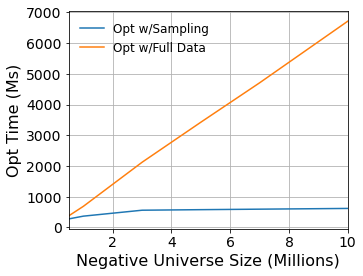

In [88]:
plt.figure(figsize=[5,4])
plt.plot(opt_data["Data Size"], opt_data["Sample Opt Time"], label="Opt w/Sampling")
plt.plot(opt_data["Data Size"], opt_data["Full Opt Time"], label="Opt w/Full Data")
plt.ylabel("Opt Time (Ms)", fontsize=16)
plt.xlabel("Negative Universe Size (Millions)", fontsize=16)
plt.legend(fontsize=12, frameon=False)
plt.xlim(xmin=.5, xmax=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('../Figures/opt_timing.pdf', bbox_inches='tight')
plt.show()